In [1]:
# !python -m pip uninstall scikit-learn --yes

In [2]:
# pip install scikit-learn==1.2.2 --user

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [5]:
# import sklearn
# print(sklearn.__version__)

In [6]:
from imblearn.over_sampling import SMOTENC
from sklearn.utils import resample

In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [8]:
file_path = './data/data_iu_proccessed_p3.csv'
# file_path = './data/data_iu_proccessed_p3_v2.csv'

file_path_test = './data/data_iu_proccessed_p3_20231.csv'

# Read the CSV file with specified data types
df = pd.read_csv(file_path)
df_20231 = pd.read_csv(file_path_test)

df = pd.concat([df, df_20231], ignore_index=True)

In [9]:
df.head(5)

,Unnamed: 0,TenMH,MaMH,Major,SoTinChi,SiSoTKB,ClassifyAs,TKB_LT2,TKB_LT3,TKB_LT4,...,TKB_LT7,TKB_TH2,TKB_TH3,TKB_TH4,TKB_TH5,TKB_TH6,TKB_TH7,HK,GVLT,GVTH
0,0,Kinh tế hành vi và chính sách công,PM5110,BA BA,2,50.0,4,0,0,0,...,0,0,0,0,0,0,0,2,Nguyen Van Phuong,unassigned
1,1,Kinh tế hành vi và chính sách công,PM5110,BA BA,2,61.0,2,0,0,0,...,0,0,0,0,0,0,0,2,Nguyen Van Phuong,unassigned
2,2,Kinh tế hành vi và chính sách công,PM5110,BA BA,2,14.0,1,0,0,0,...,7,0,0,0,0,0,0,3,Nguyen Van Phuong,unassigned
3,3,Kinh tế lượng và phân tích chính sách,PM5214,BA BA,2,50.0,4,0,0,0,...,0,0,0,0,0,0,0,2,Nguyen Phuong Anh,unassigned
4,4,Kỹ năng lãnh đạo trong khu vực công,PM5212,BA BA,2,41.0,2,0,0,0,...,7,0,0,0,0,0,0,1,Trinh Viet Dung,unassigned


In [10]:
df_20231.head(5)

,Unnamed: 0,TenMH,MaMH,Major,SoTinChi,SiSoTKB,ClassifyAs,TKB_LT2,TKB_LT3,TKB_LT4,...,TKB_LT7,TKB_TH2,TKB_TH3,TKB_TH4,TKB_TH5,TKB_TH6,TKB_TH7,HK,GVLT,GVTH
0,0,Forecasting Techniques,ISE058IU,IEMIEM,3,15,4,0,0,13,...,0,0,0,0,0,0,0,1,Tran Duc Vi,unassigned
1,1,AI for Healthcare,BM096IU,BM BME,3,55,3,0,0,1,...,0,0,0,0,0,0,0,1,Ngo Thi Lua,unassigned
2,2,Academic English,BT310UN,BT BT,3,40,4,0,0,0,...,1,0,0,0,0,0,0,1,Nguyen Van Toan,unassigned
3,3,Academic and Professional Development,UMCDQ3-15-3,BA BA,4,40,3,0,0,0,...,7,0,0,0,0,0,0,1,Nguyen The Man,unassigned
4,4,Academic and Professional Development,UMCDQ3-15-3,BA BA,4,40,3,0,0,0,...,0,0,0,0,0,0,0,1,Alang Tho,unassigned


In [11]:
# Remove the specified columns
columns_to_remove = ['Unnamed: 0', 'TenMH']  # Columns to be removed
df.drop(columns=columns_to_remove, inplace=True)
df.dtypes

df_20231.drop(columns=columns_to_remove, inplace=True)

In [12]:
df.shape

(9762, 20)

In [13]:
#-----------4 Classes--------------
#Create a dictionary to map values
class_mapping = {1: 'Class1', 2: 'Class2', 3: 'Class3', 4: 'Class4'}

# Map the values in the 'ClassifyAs' column
df['ClassifyAs'] = df['ClassifyAs'].map(class_mapping)

#-----------2 Classes (Over90)--------------
# # Create a dictionary to map values
# class_mapping = {1: 'Class1', 2: 'Class1', 3: 'Class2', 4: 'Class2'}

# # Map the values in the 'ClassifyAs' column
# df['ClassifyAs'] = df['ClassifyAs'].map(class_mapping)

#---------- 2 Classes (TR89-Spread)-------------
# # Create a dictionary to map values
# class_mapping = {1: 'Class1', 2: 'Class2', 3: 'Class1', 4: 'Class2'}

# # Map the values in the 'ClassifyAs' column
# df['ClassifyAs'] = df['ClassifyAs'].map(class_mapping)

#---------- 2 Classes (High vs Low priority course)-------------
# # Create a dictionary to map values
# class_mapping = {1: 'Class1', 2: 'Class2', 3: 'Class2', 4: 'Class2'}

# # Map the values in the 'ClassifyAs' column
# df['ClassifyAs'] = df['ClassifyAs'].map(class_mapping)

#-----------------------------------------------------------------

In [14]:
df_20231['ClassifyAs'] = df_20231['ClassifyAs'].map(class_mapping)

In [15]:
# Count the occurrences of each class
class_counts = df['ClassifyAs'].value_counts()

# Print the counts
print(class_counts)

ClassifyAs
Class4    4520
Class2    3209
Class1    1197
Class3     836
Name: count, dtype: int64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4040672	test: 0.3940534	best: 0.3940534 (0)	total: 186ms	remaining: 3m 5s
10:	learn: 0.5090991	test: 0.4854480	best: 0.4854480 (10)	total: 452ms	remaining: 40.6s
20:	learn: 0.5204060	test: 0.5242105	best: 0.5242105 (20)	total: 725ms	remaining: 33.8s
30:	learn: 0.5315948	test: 0.5355727	best: 0.5355727 (30)	total: 1.04s	remaining: 32.6s
40:	learn: 0.5377843	test: 0.5437841	best: 0.5442075 (39)	total: 1.57s	remaining: 36.8s
50:	learn: 0.5410523	test: 0.5445960	best: 0.5451731 (43)	total: 2.42s	remaining: 45s
60:	learn: 0.5524525	test: 0.5434700	best: 0.5451731 (43)	total: 3.35s	remaining: 51.6s
70:	learn: 0.5581231	test: 0.5461111	best: 0.5461111 (70)	total: 3.69s	remaining: 48.3s
80:	learn: 0.5616698	test: 0.5465806	best: 0.5465806 (80)	total: 3.94s	remaining: 44.7s
90:	learn: 0.5647297	test: 0.5405385	best: 0.5465806 (80)	total: 4.19s	remaining: 41.9s
100:	learn: 0.5699341	test: 0.5391356	best: 0.5465806 (80)	total: 4.43s	remaining: 39.5s
110:	learn: 0.5759694	test: 0.54123

920:	learn: 0.7730265	test: 0.5264068	best: 0.5491847 (162)	total: 27.1s	remaining: 2.32s
930:	learn: 0.7744970	test: 0.5264049	best: 0.5491847 (162)	total: 27.3s	remaining: 2.03s
940:	learn: 0.7755256	test: 0.5290773	best: 0.5491847 (162)	total: 27.6s	remaining: 1.73s
950:	learn: 0.7761538	test: 0.5267952	best: 0.5491847 (162)	total: 27.9s	remaining: 1.44s
960:	learn: 0.7781529	test: 0.5265587	best: 0.5491847 (162)	total: 28.1s	remaining: 1.14s
970:	learn: 0.7803368	test: 0.5271359	best: 0.5491847 (162)	total: 28.4s	remaining: 848ms
980:	learn: 0.7805054	test: 0.5262895	best: 0.5491847 (162)	total: 28.7s	remaining: 555ms
990:	learn: 0.7833780	test: 0.5264086	best: 0.5491847 (162)	total: 29s	remaining: 263ms
999:	learn: 0.7843385	test: 0.5254791	best: 0.5491847 (162)	total: 29.2s	remaining: 0us

bestTest = 0.5491846849
bestIteration = 162

Shrink model to first 163 iterations.


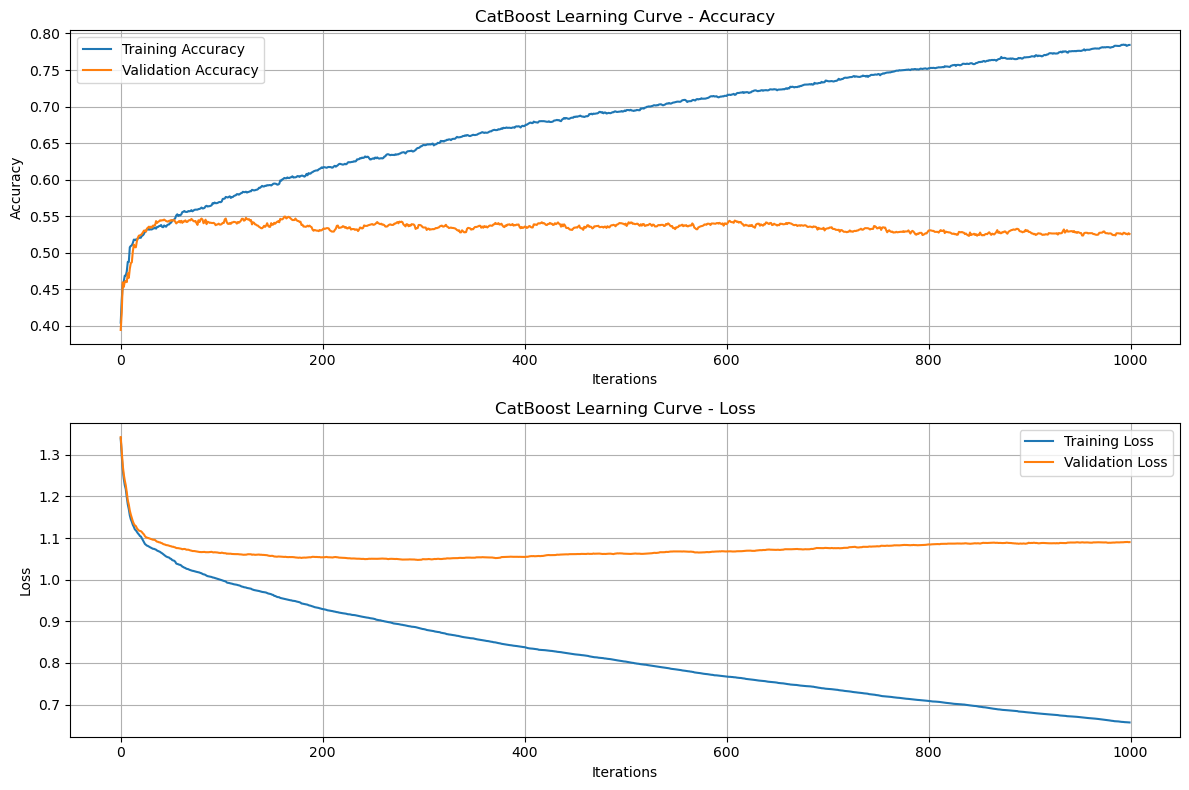

Model Accuracy: 0.5345622119815668
0:	learn: 0.3586868	total: 18.6ms	remaining: 18.6s
1:	learn: 0.4313897	total: 43.8ms	remaining: 21.9s
2:	learn: 0.4664107	total: 69.6ms	remaining: 23.1s
3:	learn: 0.4756506	total: 91.7ms	remaining: 22.8s
4:	learn: 0.4800999	total: 119ms	remaining: 23.7s
5:	learn: 0.4810508	total: 149ms	remaining: 24.6s
6:	learn: 0.4827352	total: 179ms	remaining: 25.4s
7:	learn: 0.4931114	total: 205ms	remaining: 25.4s
8:	learn: 0.4933003	total: 231ms	remaining: 25.4s
9:	learn: 0.4960723	total: 252ms	remaining: 25s
10:	learn: 0.5068752	total: 274ms	remaining: 24.6s
11:	learn: 0.5075158	total: 296ms	remaining: 24.4s
12:	learn: 0.5112807	total: 323ms	remaining: 24.5s
13:	learn: 0.5116712	total: 347ms	remaining: 24.4s
14:	learn: 0.5142774	total: 369ms	remaining: 24.2s
15:	learn: 0.5172380	total: 392ms	remaining: 24.1s
16:	learn: 0.5173652	total: 413ms	remaining: 23.9s
17:	learn: 0.5188805	total: 436ms	remaining: 23.8s
18:	learn: 0.5207836	total: 459ms	remaining: 23.7s
19:	

163:	learn: 0.6025065	total: 3.92s	remaining: 20s
164:	learn: 0.6033783	total: 3.94s	remaining: 20s
165:	learn: 0.6021057	total: 3.96s	remaining: 19.9s
166:	learn: 0.6031834	total: 3.99s	remaining: 19.9s
167:	learn: 0.6049775	total: 4.01s	remaining: 19.9s
168:	learn: 0.6061534	total: 4.03s	remaining: 19.8s
169:	learn: 0.6062626	total: 4.05s	remaining: 19.8s
170:	learn: 0.6071345	total: 4.07s	remaining: 19.7s
171:	learn: 0.6069066	total: 4.09s	remaining: 19.7s
172:	learn: 0.6070253	total: 4.11s	remaining: 19.7s
173:	learn: 0.6073197	total: 4.14s	remaining: 19.6s
174:	learn: 0.6071777	total: 4.16s	remaining: 19.6s
175:	learn: 0.6094738	total: 4.18s	remaining: 19.6s
176:	learn: 0.6089954	total: 4.2s	remaining: 19.5s
177:	learn: 0.6091919	total: 4.22s	remaining: 19.5s
178:	learn: 0.6107164	total: 4.24s	remaining: 19.5s
179:	learn: 0.6092914	total: 4.26s	remaining: 19.4s
180:	learn: 0.6100175	total: 4.29s	remaining: 19.4s
181:	learn: 0.6123120	total: 4.32s	remaining: 19.4s
182:	learn: 0.611

330:	learn: 0.6675905	total: 8.37s	remaining: 16.9s
331:	learn: 0.6670791	total: 8.4s	remaining: 16.9s
332:	learn: 0.6678850	total: 8.43s	remaining: 16.9s
333:	learn: 0.6677539	total: 8.45s	remaining: 16.8s
334:	learn: 0.6670484	total: 8.47s	remaining: 16.8s
335:	learn: 0.6679532	total: 8.5s	remaining: 16.8s
336:	learn: 0.6677356	total: 8.53s	remaining: 16.8s
337:	learn: 0.6680301	total: 8.55s	remaining: 16.8s
338:	learn: 0.6678542	total: 8.59s	remaining: 16.7s
339:	learn: 0.6686822	total: 8.61s	remaining: 16.7s
340:	learn: 0.6681598	total: 8.64s	remaining: 16.7s
341:	learn: 0.6703240	total: 8.68s	remaining: 16.7s
342:	learn: 0.6722830	total: 8.71s	remaining: 16.7s
343:	learn: 0.6728274	total: 8.74s	remaining: 16.7s
344:	learn: 0.6730040	total: 8.76s	remaining: 16.6s
345:	learn: 0.6753330	total: 8.79s	remaining: 16.6s
346:	learn: 0.6737337	total: 8.81s	remaining: 16.6s
347:	learn: 0.6732120	total: 8.83s	remaining: 16.5s
348:	learn: 0.6719270	total: 8.85s	remaining: 16.5s
349:	learn: 0.

494:	learn: 0.7071974	total: 12.3s	remaining: 12.6s
495:	learn: 0.7076114	total: 12.3s	remaining: 12.5s
496:	learn: 0.7071228	total: 12.4s	remaining: 12.5s
497:	learn: 0.7067206	total: 12.4s	remaining: 12.5s
498:	learn: 0.7081683	total: 12.4s	remaining: 12.4s
499:	learn: 0.7083535	total: 12.4s	remaining: 12.4s
500:	learn: 0.7074289	total: 12.4s	remaining: 12.4s
501:	learn: 0.7081792	total: 12.5s	remaining: 12.4s
502:	learn: 0.7090284	total: 12.5s	remaining: 12.3s
503:	learn: 0.7095504	total: 12.5s	remaining: 12.3s
504:	learn: 0.7090610	total: 12.5s	remaining: 12.3s
505:	learn: 0.7086479	total: 12.6s	remaining: 12.3s
506:	learn: 0.7080061	total: 12.6s	remaining: 12.2s
507:	learn: 0.7077877	total: 12.6s	remaining: 12.2s
508:	learn: 0.7079731	total: 12.6s	remaining: 12.2s
509:	learn: 0.7088998	total: 12.7s	remaining: 12.2s
510:	learn: 0.7091277	total: 12.7s	remaining: 12.1s
511:	learn: 0.7098347	total: 12.7s	remaining: 12.1s
512:	learn: 0.7102903	total: 12.7s	remaining: 12.1s
513:	learn: 

655:	learn: 0.7380387	total: 16.2s	remaining: 8.52s
656:	learn: 0.7388886	total: 16.3s	remaining: 8.49s
657:	learn: 0.7382578	total: 16.3s	remaining: 8.47s
658:	learn: 0.7387370	total: 16.3s	remaining: 8.44s
659:	learn: 0.7394666	total: 16.3s	remaining: 8.42s
660:	learn: 0.7388358	total: 16.4s	remaining: 8.39s
661:	learn: 0.7380730	total: 16.4s	remaining: 8.37s
662:	learn: 0.7392057	total: 16.4s	remaining: 8.34s
663:	learn: 0.7407288	total: 16.4s	remaining: 8.32s
664:	learn: 0.7405339	total: 16.5s	remaining: 8.29s
665:	learn: 0.7402070	total: 16.5s	remaining: 8.27s
666:	learn: 0.7407301	total: 16.5s	remaining: 8.25s
667:	learn: 0.7414599	total: 16.5s	remaining: 8.22s
668:	learn: 0.7411244	total: 16.6s	remaining: 8.2s
669:	learn: 0.7412336	total: 16.6s	remaining: 8.18s
670:	learn: 0.7414849	total: 16.6s	remaining: 8.15s
671:	learn: 0.7414951	total: 16.6s	remaining: 8.12s
672:	learn: 0.7417763	total: 16.7s	remaining: 8.1s
673:	learn: 0.7422116	total: 16.7s	remaining: 8.07s
674:	learn: 0.

816:	learn: 0.7664784	total: 20.4s	remaining: 4.58s
817:	learn: 0.7671530	total: 20.5s	remaining: 4.55s
818:	learn: 0.7673714	total: 20.5s	remaining: 4.53s
819:	learn: 0.7672190	total: 20.5s	remaining: 4.5s
820:	learn: 0.7673282	total: 20.5s	remaining: 4.48s
821:	learn: 0.7675882	total: 20.6s	remaining: 4.46s
822:	learn: 0.7671530	total: 20.6s	remaining: 4.43s
823:	learn: 0.7684160	total: 20.6s	remaining: 4.41s
824:	learn: 0.7674696	total: 20.7s	remaining: 4.38s
825:	learn: 0.7671091	total: 20.7s	remaining: 4.36s
826:	learn: 0.7669904	total: 20.7s	remaining: 4.33s
827:	learn: 0.7668160	total: 20.7s	remaining: 4.31s
828:	learn: 0.7667830	total: 20.8s	remaining: 4.28s
829:	learn: 0.7672095	total: 20.8s	remaining: 4.26s
830:	learn: 0.7670681	total: 20.8s	remaining: 4.24s
831:	learn: 0.7672425	total: 20.9s	remaining: 4.21s
832:	learn: 0.7687246	total: 20.9s	remaining: 4.19s
833:	learn: 0.7671575	total: 20.9s	remaining: 4.17s
834:	learn: 0.7681363	total: 21s	remaining: 4.14s
835:	learn: 0.7

979:	learn: 0.7940690	total: 25.4s	remaining: 519ms
980:	learn: 0.7939598	total: 25.5s	remaining: 493ms
981:	learn: 0.7942213	total: 25.5s	remaining: 467ms
982:	learn: 0.7935473	total: 25.5s	remaining: 441ms
983:	learn: 0.7940367	total: 25.5s	remaining: 415ms
984:	learn: 0.7936990	total: 25.6s	remaining: 390ms
985:	learn: 0.7950938	total: 25.6s	remaining: 364ms
986:	learn: 0.7950711	total: 25.6s	remaining: 338ms
987:	learn: 0.7945495	total: 25.7s	remaining: 312ms
988:	learn: 0.7928080	total: 25.7s	remaining: 286ms
989:	learn: 0.7937011	total: 25.7s	remaining: 260ms
990:	learn: 0.7942234	total: 25.8s	remaining: 234ms
991:	learn: 0.7954660	total: 25.8s	remaining: 208ms
992:	learn: 0.7952147	total: 25.8s	remaining: 182ms
993:	learn: 0.7946593	total: 25.8s	remaining: 156ms
994:	learn: 0.7947685	total: 25.9s	remaining: 130ms
995:	learn: 0.7958893	total: 25.9s	remaining: 104ms
996:	learn: 0.7961502	total: 25.9s	remaining: 78ms
997:	learn: 0.7953772	total: 26s	remaining: 52ms
998:	learn: 0.79

142:	learn: 0.5947624	total: 4.38s	remaining: 26.3s
143:	learn: 0.5943178	total: 4.41s	remaining: 26.2s
144:	learn: 0.5948393	total: 4.43s	remaining: 26.1s
145:	learn: 0.5950906	total: 4.45s	remaining: 26.1s
146:	learn: 0.5947647	total: 4.48s	remaining: 26s
147:	learn: 0.5968335	total: 4.5s	remaining: 25.9s
148:	learn: 0.5982145	total: 4.53s	remaining: 25.9s
149:	learn: 0.5981712	total: 4.55s	remaining: 25.8s
150:	learn: 0.5987148	total: 4.58s	remaining: 25.7s
151:	learn: 0.5989874	total: 4.6s	remaining: 25.7s
152:	learn: 0.5976387	total: 4.63s	remaining: 25.6s
153:	learn: 0.5969214	total: 4.65s	remaining: 25.6s
154:	learn: 0.5998834	total: 4.68s	remaining: 25.5s
155:	learn: 0.6010461	total: 4.71s	remaining: 25.5s
156:	learn: 0.5993032	total: 4.74s	remaining: 25.5s
157:	learn: 0.5990642	total: 4.77s	remaining: 25.4s
158:	learn: 0.5991280	total: 4.8s	remaining: 25.4s
159:	learn: 0.6002695	total: 4.84s	remaining: 25.4s
160:	learn: 0.6013282	total: 4.87s	remaining: 25.4s
161:	learn: 0.601

308:	learn: 0.6494469	total: 8.34s	remaining: 18.7s
309:	learn: 0.6505678	total: 8.36s	remaining: 18.6s
310:	learn: 0.6490102	total: 8.38s	remaining: 18.6s
311:	learn: 0.6494571	total: 8.41s	remaining: 18.5s
312:	learn: 0.6502732	total: 8.43s	remaining: 18.5s
313:	learn: 0.6500022	total: 8.45s	remaining: 18.5s
314:	learn: 0.6514923	total: 8.48s	remaining: 18.4s
315:	learn: 0.6539408	total: 8.5s	remaining: 18.4s
316:	learn: 0.6543445	total: 8.52s	remaining: 18.4s
317:	learn: 0.6549344	total: 8.54s	remaining: 18.3s
318:	learn: 0.6543782	total: 8.56s	remaining: 18.3s
319:	learn: 0.6544441	total: 8.59s	remaining: 18.2s
320:	learn: 0.6548016	total: 8.61s	remaining: 18.2s
321:	learn: 0.6542997	total: 8.63s	remaining: 18.2s
322:	learn: 0.6550727	total: 8.66s	remaining: 18.1s
323:	learn: 0.6558456	total: 8.68s	remaining: 18.1s
324:	learn: 0.6556932	total: 8.7s	remaining: 18.1s
325:	learn: 0.6548874	total: 8.73s	remaining: 18s
326:	learn: 0.6555745	total: 8.75s	remaining: 18s
327:	learn: 0.6555

467:	learn: 0.6898116	total: 12.3s	remaining: 14s
468:	learn: 0.6887535	total: 12.3s	remaining: 14s
469:	learn: 0.6890048	total: 12.4s	remaining: 13.9s
470:	learn: 0.6889286	total: 12.4s	remaining: 13.9s
471:	learn: 0.6894180	total: 12.4s	remaining: 13.9s
472:	learn: 0.6905162	total: 12.5s	remaining: 13.9s
473:	learn: 0.6900268	total: 12.5s	remaining: 13.9s
474:	learn: 0.6915075	total: 12.5s	remaining: 13.8s
475:	learn: 0.6896458	total: 12.6s	remaining: 13.8s
476:	learn: 0.6897000	total: 12.6s	remaining: 13.8s
477:	learn: 0.6895579	total: 12.6s	remaining: 13.8s
478:	learn: 0.6916592	total: 12.6s	remaining: 13.8s
479:	learn: 0.6913654	total: 12.7s	remaining: 13.7s
480:	learn: 0.6915837	total: 12.7s	remaining: 13.7s
481:	learn: 0.6922915	total: 12.7s	remaining: 13.7s
482:	learn: 0.6921486	total: 12.8s	remaining: 13.7s
483:	learn: 0.6928453	total: 12.8s	remaining: 13.6s
484:	learn: 0.6916042	total: 12.8s	remaining: 13.6s
485:	learn: 0.6921280	total: 12.8s	remaining: 13.6s
486:	learn: 0.69

626:	learn: 0.7222154	total: 17s	remaining: 10.1s
627:	learn: 0.7218454	total: 17s	remaining: 10.1s
628:	learn: 0.7211919	total: 17s	remaining: 10s
629:	learn: 0.7213765	total: 17.1s	remaining: 10s
630:	learn: 0.7223883	total: 17.1s	remaining: 10s
631:	learn: 0.7212351	total: 17.1s	remaining: 9.98s
632:	learn: 0.7219846	total: 17.2s	remaining: 9.95s
633:	learn: 0.7220512	total: 17.2s	remaining: 9.93s
634:	learn: 0.7229003	total: 17.2s	remaining: 9.9s
635:	learn: 0.7221163	total: 17.3s	remaining: 9.88s
636:	learn: 0.7218224	total: 17.3s	remaining: 9.85s
637:	learn: 0.7227156	total: 17.3s	remaining: 9.82s
638:	learn: 0.7231955	total: 17.3s	remaining: 9.79s
639:	learn: 0.7230336	total: 17.4s	remaining: 9.76s
640:	learn: 0.7230762	total: 17.4s	remaining: 9.73s
641:	learn: 0.7235874	total: 17.4s	remaining: 9.71s
642:	learn: 0.7241956	total: 17.4s	remaining: 9.68s
643:	learn: 0.7250439	total: 17.5s	remaining: 9.65s
644:	learn: 0.7245536	total: 17.5s	remaining: 9.62s
645:	learn: 0.7250752	tot

789:	learn: 0.7561121	total: 22.1s	remaining: 5.88s
790:	learn: 0.7560799	total: 22.2s	remaining: 5.86s
791:	learn: 0.7561129	total: 22.2s	remaining: 5.83s
792:	learn: 0.7560147	total: 22.2s	remaining: 5.8s
793:	learn: 0.7556016	total: 22.3s	remaining: 5.78s
794:	learn: 0.7554924	total: 22.3s	remaining: 5.75s
795:	learn: 0.7560573	total: 22.3s	remaining: 5.72s
796:	learn: 0.7562096	total: 22.4s	remaining: 5.7s
797:	learn: 0.7572668	total: 22.4s	remaining: 5.67s
798:	learn: 0.7565694	total: 22.4s	remaining: 5.64s
799:	learn: 0.7569078	total: 22.5s	remaining: 5.62s
800:	learn: 0.7576807	total: 22.5s	remaining: 5.59s
801:	learn: 0.7574522	total: 22.5s	remaining: 5.56s
802:	learn: 0.7572021	total: 22.6s	remaining: 5.54s
803:	learn: 0.7581377	total: 22.6s	remaining: 5.51s
804:	learn: 0.7573883	total: 22.7s	remaining: 5.49s
805:	learn: 0.7578344	total: 22.7s	remaining: 5.46s
806:	learn: 0.7574213	total: 22.7s	remaining: 5.43s
807:	learn: 0.7574558	total: 22.8s	remaining: 5.41s
808:	learn: 0.

952:	learn: 0.7821935	total: 27.2s	remaining: 1.34s
953:	learn: 0.7822023	total: 27.3s	remaining: 1.31s
954:	learn: 0.7820170	total: 27.3s	remaining: 1.28s
955:	learn: 0.7819846	total: 27.3s	remaining: 1.26s
956:	learn: 0.7817231	total: 27.3s	remaining: 1.23s
957:	learn: 0.7823121	total: 27.3s	remaining: 1.2s
958:	learn: 0.7821047	total: 27.4s	remaining: 1.17s
959:	learn: 0.7821377	total: 27.4s	remaining: 1.14s
960:	learn: 0.7816154	total: 27.4s	remaining: 1.11s
961:	learn: 0.7820623	total: 27.4s	remaining: 1.08s
962:	learn: 0.7825319	total: 27.5s	remaining: 1.05s
963:	learn: 0.7826513	total: 27.5s	remaining: 1.03s
964:	learn: 0.7824982	total: 27.5s	remaining: 997ms
965:	learn: 0.7819098	total: 27.5s	remaining: 969ms
966:	learn: 0.7819854	total: 27.5s	remaining: 940ms
967:	learn: 0.7822132	total: 27.6s	remaining: 911ms
968:	learn: 0.7825077	total: 27.6s	remaining: 882ms
969:	learn: 0.7839122	total: 27.6s	remaining: 854ms
970:	learn: 0.7840755	total: 27.6s	remaining: 825ms
971:	learn: 0

116:	learn: 0.5882683	total: 2.95s	remaining: 22.2s
117:	learn: 0.5892501	total: 2.97s	remaining: 22.2s
118:	learn: 0.5911337	total: 2.99s	remaining: 22.1s
119:	learn: 0.5914040	total: 3.01s	remaining: 22.1s
120:	learn: 0.5921242	total: 3.03s	remaining: 22s
121:	learn: 0.5926248	total: 3.06s	remaining: 22s
122:	learn: 0.5935274	total: 3.08s	remaining: 21.9s
123:	learn: 0.5937127	total: 3.1s	remaining: 21.9s
124:	learn: 0.5937032	total: 3.12s	remaining: 21.9s
125:	learn: 0.5931149	total: 3.14s	remaining: 21.8s
126:	learn: 0.5934290	total: 3.17s	remaining: 21.8s
127:	learn: 0.5945954	total: 3.19s	remaining: 21.7s
128:	learn: 0.5949427	total: 3.21s	remaining: 21.7s
129:	learn: 0.5947149	total: 3.23s	remaining: 21.6s
130:	learn: 0.5942679	total: 3.25s	remaining: 21.6s
131:	learn: 0.5954461	total: 3.28s	remaining: 21.6s
132:	learn: 0.5952607	total: 3.3s	remaining: 21.5s
133:	learn: 0.5962937	total: 3.32s	remaining: 21.5s
134:	learn: 0.5966745	total: 3.35s	remaining: 21.4s
135:	learn: 0.5960

280:	learn: 0.6486885	total: 6.65s	remaining: 17s
281:	learn: 0.6486672	total: 6.68s	remaining: 17s
282:	learn: 0.6483940	total: 6.7s	remaining: 17s
283:	learn: 0.6493618	total: 6.72s	remaining: 17s
284:	learn: 0.6502775	total: 6.75s	remaining: 16.9s
285:	learn: 0.6505060	total: 6.77s	remaining: 16.9s
286:	learn: 0.6503537	total: 6.8s	remaining: 16.9s
287:	learn: 0.6504409	total: 6.82s	remaining: 16.9s
288:	learn: 0.6512556	total: 6.85s	remaining: 16.8s
289:	learn: 0.6512131	total: 6.87s	remaining: 16.8s
290:	learn: 0.6524557	total: 6.89s	remaining: 16.8s
291:	learn: 0.6525641	total: 6.92s	remaining: 16.8s
292:	learn: 0.6521838	total: 6.95s	remaining: 16.8s
293:	learn: 0.6525963	total: 6.97s	remaining: 16.7s
294:	learn: 0.6546439	total: 7s	remaining: 16.7s
295:	learn: 0.6557545	total: 7.03s	remaining: 16.7s
296:	learn: 0.6556350	total: 7.05s	remaining: 16.7s
297:	learn: 0.6550460	total: 7.07s	remaining: 16.7s
298:	learn: 0.6556014	total: 7.1s	remaining: 16.6s
299:	learn: 0.6551221	tota

441:	learn: 0.6930165	total: 10.6s	remaining: 13.4s
442:	learn: 0.6940853	total: 10.6s	remaining: 13.3s
443:	learn: 0.6938451	total: 10.6s	remaining: 13.3s
444:	learn: 0.6930064	total: 10.7s	remaining: 13.3s
445:	learn: 0.6931486	total: 10.7s	remaining: 13.3s
446:	learn: 0.6928218	total: 10.7s	remaining: 13.2s
447:	learn: 0.6930394	total: 10.7s	remaining: 13.2s
448:	learn: 0.6933345	total: 10.8s	remaining: 13.2s
449:	learn: 0.6935946	total: 10.8s	remaining: 13.2s
450:	learn: 0.6943681	total: 10.8s	remaining: 13.1s
451:	learn: 0.6953153	total: 10.8s	remaining: 13.1s
452:	learn: 0.6955761	total: 10.8s	remaining: 13.1s
453:	learn: 0.6953147	total: 10.9s	remaining: 13.1s
454:	learn: 0.6953901	total: 10.9s	remaining: 13s
455:	learn: 0.6961402	total: 10.9s	remaining: 13s
456:	learn: 0.6967167	total: 10.9s	remaining: 13s
457:	learn: 0.6970457	total: 10.9s	remaining: 13s
458:	learn: 0.6974362	total: 11s	remaining: 12.9s
459:	learn: 0.6974998	total: 11s	remaining: 12.9s
460:	learn: 0.6978800	to

608:	learn: 0.7280807	total: 14.3s	remaining: 9.2s
609:	learn: 0.7282659	total: 14.4s	remaining: 9.18s
610:	learn: 0.7287348	total: 14.4s	remaining: 9.15s
611:	learn: 0.7280382	total: 14.4s	remaining: 9.13s
612:	learn: 0.7290382	total: 14.4s	remaining: 9.1s
613:	learn: 0.7291576	total: 14.4s	remaining: 9.08s
614:	learn: 0.7292008	total: 14.5s	remaining: 9.05s
615:	learn: 0.7287554	total: 14.5s	remaining: 9.03s
616:	learn: 0.7298323	total: 14.5s	remaining: 9s
617:	learn: 0.7306491	total: 14.5s	remaining: 8.98s
618:	learn: 0.7318339	total: 14.5s	remaining: 8.95s
619:	learn: 0.7320946	total: 14.6s	remaining: 8.93s
620:	learn: 0.7328881	total: 14.6s	remaining: 8.91s
621:	learn: 0.7322574	total: 14.6s	remaining: 8.88s
622:	learn: 0.7320831	total: 14.6s	remaining: 8.86s
623:	learn: 0.7323438	total: 14.7s	remaining: 8.84s
624:	learn: 0.7324318	total: 14.7s	remaining: 8.81s
625:	learn: 0.7329320	total: 14.7s	remaining: 8.79s
626:	learn: 0.7322023	total: 14.7s	remaining: 8.76s
627:	learn: 0.732

775:	learn: 0.7580205	total: 18.5s	remaining: 5.34s
776:	learn: 0.7582914	total: 18.5s	remaining: 5.31s
777:	learn: 0.7581830	total: 18.5s	remaining: 5.29s
778:	learn: 0.7576709	total: 18.6s	remaining: 5.26s
779:	learn: 0.7572349	total: 18.6s	remaining: 5.24s
780:	learn: 0.7571486	total: 18.6s	remaining: 5.21s
781:	learn: 0.7568320	total: 18.6s	remaining: 5.19s
782:	learn: 0.7565281	total: 18.6s	remaining: 5.17s
783:	learn: 0.7569742	total: 18.7s	remaining: 5.14s
784:	learn: 0.7566695	total: 18.7s	remaining: 5.12s
785:	learn: 0.7567025	total: 18.7s	remaining: 5.09s
786:	learn: 0.7563003	total: 18.7s	remaining: 5.07s
787:	learn: 0.7572806	total: 18.8s	remaining: 5.04s
788:	learn: 0.7579882	total: 18.8s	remaining: 5.02s
789:	learn: 0.7580331	total: 18.8s	remaining: 5s
790:	learn: 0.7582498	total: 18.8s	remaining: 4.97s
791:	learn: 0.7585436	total: 18.8s	remaining: 4.95s
792:	learn: 0.7586630	total: 18.9s	remaining: 4.92s
793:	learn: 0.7588146	total: 18.9s	remaining: 4.9s
794:	learn: 0.76

937:	learn: 0.7814279	total: 22.3s	remaining: 1.47s
938:	learn: 0.7815033	total: 22.3s	remaining: 1.45s
939:	learn: 0.7806542	total: 22.3s	remaining: 1.42s
940:	learn: 0.7802849	total: 22.4s	remaining: 1.4s
941:	learn: 0.7811561	total: 22.4s	remaining: 1.38s
942:	learn: 0.7813847	total: 22.4s	remaining: 1.35s
943:	learn: 0.7813517	total: 22.4s	remaining: 1.33s
944:	learn: 0.7815348	total: 22.5s	remaining: 1.31s
945:	learn: 0.7821340	total: 22.5s	remaining: 1.28s
946:	learn: 0.7823524	total: 22.5s	remaining: 1.26s
947:	learn: 0.7837034	total: 22.5s	remaining: 1.24s
948:	learn: 0.7836608	total: 22.6s	remaining: 1.21s
949:	learn: 0.7836601	total: 22.6s	remaining: 1.19s
950:	learn: 0.7841832	total: 22.6s	remaining: 1.17s
951:	learn: 0.7847817	total: 22.6s	remaining: 1.14s
952:	learn: 0.7852938	total: 22.7s	remaining: 1.12s
953:	learn: 0.7852835	total: 22.7s	remaining: 1.09s
954:	learn: 0.7850982	total: 22.7s	remaining: 1.07s
955:	learn: 0.7851516	total: 22.7s	remaining: 1.05s
956:	learn: 0

99:	learn: 0.5817190	total: 2.39s	remaining: 21.5s
100:	learn: 0.5804348	total: 2.41s	remaining: 21.5s
101:	learn: 0.5812076	total: 2.43s	remaining: 21.4s
102:	learn: 0.5800215	total: 2.46s	remaining: 21.4s
103:	learn: 0.5804347	total: 2.48s	remaining: 21.4s
104:	learn: 0.5813167	total: 2.51s	remaining: 21.4s
105:	learn: 0.5813088	total: 2.53s	remaining: 21.4s
106:	learn: 0.5811892	total: 2.56s	remaining: 21.3s
107:	learn: 0.5827116	total: 2.58s	remaining: 21.3s
108:	learn: 0.5825695	total: 2.6s	remaining: 21.3s
109:	learn: 0.5836039	total: 2.63s	remaining: 21.3s
110:	learn: 0.5851279	total: 2.65s	remaining: 21.3s
111:	learn: 0.5838759	total: 2.68s	remaining: 21.2s
112:	learn: 0.5848678	total: 2.7s	remaining: 21.2s
113:	learn: 0.5857829	total: 2.73s	remaining: 21.2s
114:	learn: 0.5857294	total: 2.75s	remaining: 21.1s
115:	learn: 0.5845102	total: 2.77s	remaining: 21.1s
116:	learn: 0.5845439	total: 2.79s	remaining: 21.1s
117:	learn: 0.5860466	total: 2.81s	remaining: 21s
118:	learn: 0.587

263:	learn: 0.6402158	total: 6.1s	remaining: 17s
264:	learn: 0.6401859	total: 6.13s	remaining: 17s
265:	learn: 0.6416973	total: 6.16s	remaining: 17s
266:	learn: 0.6414592	total: 6.19s	remaining: 17s
267:	learn: 0.6398709	total: 6.21s	remaining: 17s
268:	learn: 0.6424388	total: 6.24s	remaining: 17s
269:	learn: 0.6426989	total: 6.26s	remaining: 16.9s
270:	learn: 0.6437554	total: 6.29s	remaining: 16.9s
271:	learn: 0.6437451	total: 6.31s	remaining: 16.9s
272:	learn: 0.6443765	total: 6.33s	remaining: 16.9s
273:	learn: 0.6455635	total: 6.35s	remaining: 16.8s
274:	learn: 0.6471203	total: 6.38s	remaining: 16.8s
275:	learn: 0.6454448	total: 6.41s	remaining: 16.8s
276:	learn: 0.6453788	total: 6.44s	remaining: 16.8s
277:	learn: 0.6452696	total: 6.46s	remaining: 16.8s
278:	learn: 0.6460770	total: 6.49s	remaining: 16.8s
279:	learn: 0.6460776	total: 6.51s	remaining: 16.7s
280:	learn: 0.6457603	total: 6.53s	remaining: 16.7s
281:	learn: 0.6462505	total: 6.55s	remaining: 16.7s
282:	learn: 0.6473187	tot

425:	learn: 0.6815353	total: 10.1s	remaining: 13.6s
426:	learn: 0.6811117	total: 10.1s	remaining: 13.6s
427:	learn: 0.6820041	total: 10.2s	remaining: 13.6s
428:	learn: 0.6823308	total: 10.2s	remaining: 13.6s
429:	learn: 0.6829520	total: 10.2s	remaining: 13.6s
430:	learn: 0.6839198	total: 10.3s	remaining: 13.5s
431:	learn: 0.6851162	total: 10.3s	remaining: 13.5s
432:	learn: 0.6851168	total: 10.3s	remaining: 13.5s
433:	learn: 0.6862275	total: 10.3s	remaining: 13.5s
434:	learn: 0.6872283	total: 10.4s	remaining: 13.4s
435:	learn: 0.6870774	total: 10.4s	remaining: 13.4s
436:	learn: 0.6872071	total: 10.4s	remaining: 13.4s
437:	learn: 0.6864883	total: 10.4s	remaining: 13.4s
438:	learn: 0.6866296	total: 10.5s	remaining: 13.4s
439:	learn: 0.6867388	total: 10.5s	remaining: 13.3s
440:	learn: 0.6864003	total: 10.5s	remaining: 13.3s
441:	learn: 0.6858794	total: 10.5s	remaining: 13.3s
442:	learn: 0.6874920	total: 10.5s	remaining: 13.3s
443:	learn: 0.6870137	total: 10.6s	remaining: 13.2s
444:	learn: 

591:	learn: 0.7239229	total: 14s	remaining: 9.66s
592:	learn: 0.7242174	total: 14s	remaining: 9.63s
593:	learn: 0.7250635	total: 14.1s	remaining: 9.61s
594:	learn: 0.7255857	total: 14.1s	remaining: 9.59s
595:	learn: 0.7264342	total: 14.1s	remaining: 9.56s
596:	learn: 0.7274796	total: 14.1s	remaining: 9.54s
597:	learn: 0.7272928	total: 14.2s	remaining: 9.51s
598:	learn: 0.7276635	total: 14.2s	remaining: 9.49s
599:	learn: 0.7286979	total: 14.2s	remaining: 9.46s
600:	learn: 0.7288723	total: 14.2s	remaining: 9.44s
601:	learn: 0.7283806	total: 14.2s	remaining: 9.41s
602:	learn: 0.7274459	total: 14.3s	remaining: 9.39s
603:	learn: 0.7271521	total: 14.3s	remaining: 9.36s
604:	learn: 0.7286006	total: 14.3s	remaining: 9.34s
605:	learn: 0.7292226	total: 14.3s	remaining: 9.32s
606:	learn: 0.7276438	total: 14.4s	remaining: 9.29s
607:	learn: 0.7275448	total: 14.4s	remaining: 9.27s
608:	learn: 0.7282957	total: 14.4s	remaining: 9.24s
609:	learn: 0.7288313	total: 14.4s	remaining: 9.22s
610:	learn: 0.72

759:	learn: 0.7547785	total: 17.7s	remaining: 5.6s
760:	learn: 0.7546034	total: 17.8s	remaining: 5.58s
761:	learn: 0.7547880	total: 17.8s	remaining: 5.56s
762:	learn: 0.7555822	total: 17.8s	remaining: 5.53s
763:	learn: 0.7554964	total: 17.8s	remaining: 5.51s
764:	learn: 0.7554862	total: 17.9s	remaining: 5.49s
765:	learn: 0.7552672	total: 17.9s	remaining: 5.46s
766:	learn: 0.7571610	total: 17.9s	remaining: 5.44s
767:	learn: 0.7571839	total: 17.9s	remaining: 5.42s
768:	learn: 0.7570747	total: 18s	remaining: 5.39s
769:	learn: 0.7569223	total: 18s	remaining: 5.37s
770:	learn: 0.7574981	total: 18s	remaining: 5.34s
771:	learn: 0.7573229	total: 18s	remaining: 5.32s
772:	learn: 0.7576834	total: 18s	remaining: 5.3s
773:	learn: 0.7577698	total: 18.1s	remaining: 5.27s
774:	learn: 0.7577039	total: 18.1s	remaining: 5.25s
775:	learn: 0.7575193	total: 18.1s	remaining: 5.23s
776:	learn: 0.7574760	total: 18.1s	remaining: 5.2s
777:	learn: 0.7578130	total: 18.2s	remaining: 5.18s
778:	learn: 0.7586290	tot

923:	learn: 0.7785789	total: 21.5s	remaining: 1.77s
924:	learn: 0.7782844	total: 21.5s	remaining: 1.74s
925:	learn: 0.7782184	total: 21.5s	remaining: 1.72s
926:	learn: 0.7781422	total: 21.6s	remaining: 1.7s
927:	learn: 0.7782851	total: 21.6s	remaining: 1.67s
928:	learn: 0.7786544	total: 21.6s	remaining: 1.65s
929:	learn: 0.7787637	total: 21.6s	remaining: 1.63s
930:	learn: 0.7793849	total: 21.7s	remaining: 1.6s
931:	learn: 0.7795271	total: 21.7s	remaining: 1.58s
932:	learn: 0.7789064	total: 21.7s	remaining: 1.56s
933:	learn: 0.7796030	total: 21.7s	remaining: 1.54s
934:	learn: 0.7791144	total: 21.8s	remaining: 1.51s
935:	learn: 0.7798873	total: 21.8s	remaining: 1.49s
936:	learn: 0.7800505	total: 21.8s	remaining: 1.47s
937:	learn: 0.7800931	total: 21.8s	remaining: 1.44s
938:	learn: 0.7800504	total: 21.9s	remaining: 1.42s
939:	learn: 0.7801260	total: 21.9s	remaining: 1.4s
940:	learn: 0.7804637	total: 21.9s	remaining: 1.37s
941:	learn: 0.7801362	total: 21.9s	remaining: 1.35s
942:	learn: 0.7

86:	learn: 0.5725703	total: 2.16s	remaining: 22.6s
87:	learn: 0.5748868	total: 2.18s	remaining: 22.6s
88:	learn: 0.5738743	total: 2.21s	remaining: 22.6s
89:	learn: 0.5739498	total: 2.23s	remaining: 22.6s
90:	learn: 0.5759095	total: 2.27s	remaining: 22.7s
91:	learn: 0.5759754	total: 2.29s	remaining: 22.6s
92:	learn: 0.5765196	total: 2.32s	remaining: 22.6s
93:	learn: 0.5751819	total: 2.34s	remaining: 22.6s
94:	learn: 0.5758465	total: 2.37s	remaining: 22.5s
95:	learn: 0.5748787	total: 2.39s	remaining: 22.5s
96:	learn: 0.5762399	total: 2.42s	remaining: 22.5s
97:	learn: 0.5778722	total: 2.44s	remaining: 22.5s
98:	learn: 0.5778825	total: 2.47s	remaining: 22.5s
99:	learn: 0.5785456	total: 2.5s	remaining: 22.5s
100:	learn: 0.5787214	total: 2.52s	remaining: 22.5s
101:	learn: 0.5789713	total: 2.55s	remaining: 22.4s
102:	learn: 0.5770459	total: 2.57s	remaining: 22.4s
103:	learn: 0.5781133	total: 2.6s	remaining: 22.4s
104:	learn: 0.5780048	total: 2.62s	remaining: 22.3s
105:	learn: 0.5797565	total:

248:	learn: 0.6378336	total: 5.87s	remaining: 17.7s
249:	learn: 0.6367339	total: 5.89s	remaining: 17.7s
250:	learn: 0.6367794	total: 5.91s	remaining: 17.6s
251:	learn: 0.6375414	total: 5.94s	remaining: 17.6s
252:	learn: 0.6369441	total: 5.96s	remaining: 17.6s
253:	learn: 0.6369433	total: 5.98s	remaining: 17.6s
254:	learn: 0.6372584	total: 6s	remaining: 17.5s
255:	learn: 0.6377303	total: 6.03s	remaining: 17.5s
256:	learn: 0.6385897	total: 6.05s	remaining: 17.5s
257:	learn: 0.6409092	total: 6.07s	remaining: 17.5s
258:	learn: 0.6417151	total: 6.1s	remaining: 17.4s
259:	learn: 0.6413114	total: 6.12s	remaining: 17.4s
260:	learn: 0.6409706	total: 6.14s	remaining: 17.4s
261:	learn: 0.6420183	total: 6.17s	remaining: 17.4s
262:	learn: 0.6423223	total: 6.19s	remaining: 17.3s
263:	learn: 0.6430953	total: 6.21s	remaining: 17.3s
264:	learn: 0.6426726	total: 6.23s	remaining: 17.3s
265:	learn: 0.6427819	total: 6.25s	remaining: 17.3s
266:	learn: 0.6428581	total: 6.28s	remaining: 17.2s
267:	learn: 0.64

412:	learn: 0.6853682	total: 9.6s	remaining: 13.6s
413:	learn: 0.6858371	total: 9.62s	remaining: 13.6s
414:	learn: 0.6863492	total: 9.65s	remaining: 13.6s
415:	learn: 0.6863492	total: 9.67s	remaining: 13.6s
416:	learn: 0.6872518	total: 9.69s	remaining: 13.5s
417:	learn: 0.6877741	total: 9.71s	remaining: 13.5s
418:	learn: 0.6884056	total: 9.74s	remaining: 13.5s
419:	learn: 0.6878180	total: 9.76s	remaining: 13.5s
420:	learn: 0.6886003	total: 9.78s	remaining: 13.5s
421:	learn: 0.6880253	total: 9.8s	remaining: 13.4s
422:	learn: 0.6879593	total: 9.82s	remaining: 13.4s
423:	learn: 0.6897212	total: 9.85s	remaining: 13.4s
424:	learn: 0.6894706	total: 9.87s	remaining: 13.3s
425:	learn: 0.6896230	total: 9.89s	remaining: 13.3s
426:	learn: 0.6897659	total: 9.91s	remaining: 13.3s
427:	learn: 0.6906143	total: 9.93s	remaining: 13.3s
428:	learn: 0.6916378	total: 9.95s	remaining: 13.2s
429:	learn: 0.6920407	total: 9.97s	remaining: 13.2s
430:	learn: 0.6909505	total: 10s	remaining: 13.2s
431:	learn: 0.69

571:	learn: 0.7217324	total: 13.3s	remaining: 9.92s
572:	learn: 0.7232225	total: 13.3s	remaining: 9.9s
573:	learn: 0.7234607	total: 13.3s	remaining: 9.88s
574:	learn: 0.7236459	total: 13.3s	remaining: 9.85s
575:	learn: 0.7246811	total: 13.4s	remaining: 9.83s
576:	learn: 0.7239381	total: 13.4s	remaining: 9.8s
577:	learn: 0.7234267	total: 13.4s	remaining: 9.78s
578:	learn: 0.7241351	total: 13.4s	remaining: 9.75s
579:	learn: 0.7240801	total: 13.4s	remaining: 9.73s
580:	learn: 0.7248538	total: 13.5s	remaining: 9.71s
581:	learn: 0.7263447	total: 13.5s	remaining: 9.68s
582:	learn: 0.7263125	total: 13.5s	remaining: 9.66s
583:	learn: 0.7271183	total: 13.5s	remaining: 9.63s
584:	learn: 0.7265725	total: 13.5s	remaining: 9.61s
585:	learn: 0.7265740	total: 13.6s	remaining: 9.58s
586:	learn: 0.7265732	total: 13.6s	remaining: 9.56s
587:	learn: 0.7260940	total: 13.6s	remaining: 9.54s
588:	learn: 0.7266494	total: 13.6s	remaining: 9.52s
589:	learn: 0.7287060	total: 13.7s	remaining: 9.5s
590:	learn: 0.7

733:	learn: 0.7574608	total: 17.2s	remaining: 6.25s
734:	learn: 0.7574710	total: 17.3s	remaining: 6.22s
735:	learn: 0.7574286	total: 17.3s	remaining: 6.2s
736:	learn: 0.7584403	total: 17.3s	remaining: 6.18s
737:	learn: 0.7578842	total: 17.3s	remaining: 6.15s
738:	learn: 0.7581121	total: 17.4s	remaining: 6.13s
739:	learn: 0.7585481	total: 17.4s	remaining: 6.1s
740:	learn: 0.7585481	total: 17.4s	remaining: 6.08s
741:	learn: 0.7583297	total: 17.4s	remaining: 6.06s
742:	learn: 0.7591026	total: 17.4s	remaining: 6.03s
743:	learn: 0.7592212	total: 17.5s	remaining: 6.01s
744:	learn: 0.7593626	total: 17.5s	remaining: 5.99s
745:	learn: 0.7596902	total: 17.5s	remaining: 5.97s
746:	learn: 0.7593201	total: 17.6s	remaining: 5.95s
747:	learn: 0.7589069	total: 17.6s	remaining: 5.92s
748:	learn: 0.7608952	total: 17.6s	remaining: 5.9s
749:	learn: 0.7607962	total: 17.6s	remaining: 5.87s
750:	learn: 0.7606878	total: 17.6s	remaining: 5.85s
751:	learn: 0.7611339	total: 17.7s	remaining: 5.83s
752:	learn: 0.7

895:	learn: 0.7826869	total: 21.2s	remaining: 2.46s
896:	learn: 0.7822408	total: 21.2s	remaining: 2.43s
897:	learn: 0.7823265	total: 21.2s	remaining: 2.41s
898:	learn: 0.7825016	total: 21.2s	remaining: 2.38s
899:	learn: 0.7829484	total: 21.3s	remaining: 2.36s
900:	learn: 0.7837551	total: 21.3s	remaining: 2.34s
901:	learn: 0.7830379	total: 21.3s	remaining: 2.31s
902:	learn: 0.7833844	total: 21.3s	remaining: 2.29s
903:	learn: 0.7836027	total: 21.3s	remaining: 2.27s
904:	learn: 0.7837449	total: 21.4s	remaining: 2.24s
905:	learn: 0.7842452	total: 21.4s	remaining: 2.22s
906:	learn: 0.7843874	total: 21.4s	remaining: 2.2s
907:	learn: 0.7853120	total: 21.4s	remaining: 2.17s
908:	learn: 0.7848659	total: 21.5s	remaining: 2.15s
909:	learn: 0.7850512	total: 21.5s	remaining: 2.13s
910:	learn: 0.7849098	total: 21.5s	remaining: 2.1s
911:	learn: 0.7852900	total: 21.5s	remaining: 2.08s
912:	learn: 0.7854753	total: 21.6s	remaining: 2.06s
913:	learn: 0.7847582	total: 21.6s	remaining: 2.03s
914:	learn: 0.

62:	learn: 0.5671315	total: 1.55s	remaining: 23s
63:	learn: 0.5659115	total: 1.57s	remaining: 22.9s
64:	learn: 0.5644638	total: 1.59s	remaining: 22.9s
65:	learn: 0.5676221	total: 1.62s	remaining: 22.9s
66:	learn: 0.5695155	total: 1.64s	remaining: 22.9s
67:	learn: 0.5683923	total: 1.68s	remaining: 23s
68:	learn: 0.5688617	total: 1.71s	remaining: 23.1s
69:	learn: 0.5669703	total: 1.74s	remaining: 23.1s
70:	learn: 0.5675692	total: 1.77s	remaining: 23.1s
71:	learn: 0.5679328	total: 1.79s	remaining: 23.1s
72:	learn: 0.5715683	total: 1.82s	remaining: 23.1s
73:	learn: 0.5739642	total: 1.85s	remaining: 23.2s
74:	learn: 0.5742789	total: 1.88s	remaining: 23.2s
75:	learn: 0.5741597	total: 1.9s	remaining: 23.2s
76:	learn: 0.5753386	total: 1.93s	remaining: 23.1s
77:	learn: 0.5738713	total: 1.97s	remaining: 23.2s
78:	learn: 0.5743381	total: 1.99s	remaining: 23.2s
79:	learn: 0.5749266	total: 2.02s	remaining: 23.2s
80:	learn: 0.5752736	total: 2.04s	remaining: 23.1s
81:	learn: 0.5758827	total: 2.06s	re

230:	learn: 0.6356421	total: 5.49s	remaining: 18.3s
231:	learn: 0.6351294	total: 5.51s	remaining: 18.3s
232:	learn: 0.6359021	total: 5.54s	remaining: 18.2s
233:	learn: 0.6371121	total: 5.55s	remaining: 18.2s
234:	learn: 0.6382891	total: 5.58s	remaining: 18.2s
235:	learn: 0.6380277	total: 5.6s	remaining: 18.1s
236:	learn: 0.6374391	total: 5.62s	remaining: 18.1s
237:	learn: 0.6382230	total: 5.64s	remaining: 18.1s
238:	learn: 0.6371121	total: 5.67s	remaining: 18s
239:	learn: 0.6377544	total: 5.69s	remaining: 18s
240:	learn: 0.6390959	total: 5.71s	remaining: 18s
241:	learn: 0.6401403	total: 5.73s	remaining: 17.9s
242:	learn: 0.6396939	total: 5.75s	remaining: 17.9s
243:	learn: 0.6389868	total: 5.78s	remaining: 17.9s
244:	learn: 0.6382235	total: 5.8s	remaining: 17.9s
245:	learn: 0.6385612	total: 5.82s	remaining: 17.8s
246:	learn: 0.6387695	total: 5.84s	remaining: 17.8s
247:	learn: 0.6389644	total: 5.87s	remaining: 17.8s
248:	learn: 0.6398471	total: 5.89s	remaining: 17.8s
249:	learn: 0.639771

395:	learn: 0.6842405	total: 10.2s	remaining: 15.6s
396:	learn: 0.6844585	total: 10.3s	remaining: 15.6s
397:	learn: 0.6833579	total: 10.3s	remaining: 15.6s
398:	learn: 0.6841738	total: 10.3s	remaining: 15.5s
399:	learn: 0.6853938	total: 10.3s	remaining: 15.5s
400:	learn: 0.6861443	total: 10.4s	remaining: 15.5s
401:	learn: 0.6860352	total: 10.4s	remaining: 15.5s
402:	learn: 0.6852517	total: 10.4s	remaining: 15.4s
403:	learn: 0.6862973	total: 10.4s	remaining: 15.4s
404:	learn: 0.6861878	total: 10.5s	remaining: 15.4s
405:	learn: 0.6854905	total: 10.5s	remaining: 15.4s
406:	learn: 0.6846408	total: 10.5s	remaining: 15.3s
407:	learn: 0.6847170	total: 10.6s	remaining: 15.3s
408:	learn: 0.6848920	total: 10.6s	remaining: 15.3s
409:	learn: 0.6862534	total: 10.6s	remaining: 15.3s
410:	learn: 0.6866570	total: 10.6s	remaining: 15.2s
411:	learn: 0.6856223	total: 10.7s	remaining: 15.2s
412:	learn: 0.6865146	total: 10.7s	remaining: 15.2s
413:	learn: 0.6853611	total: 10.7s	remaining: 15.2s
414:	learn: 

561:	learn: 0.7206886	total: 14.4s	remaining: 11.3s
562:	learn: 0.7207647	total: 14.5s	remaining: 11.2s
563:	learn: 0.7198718	total: 14.5s	remaining: 11.2s
564:	learn: 0.7204603	total: 14.5s	remaining: 11.2s
565:	learn: 0.7207218	total: 14.5s	remaining: 11.2s
566:	learn: 0.7215488	total: 14.6s	remaining: 11.1s
567:	learn: 0.7224088	total: 14.6s	remaining: 11.1s
568:	learn: 0.7219956	total: 14.6s	remaining: 11.1s
569:	learn: 0.7238559	total: 14.7s	remaining: 11.1s
570:	learn: 0.7239221	total: 14.7s	remaining: 11s
571:	learn: 0.7248147	total: 14.7s	remaining: 11s
572:	learn: 0.7244220	total: 14.8s	remaining: 11s
573:	learn: 0.7242373	total: 14.8s	remaining: 11s
574:	learn: 0.7240523	total: 14.8s	remaining: 11s
575:	learn: 0.7237685	total: 14.8s	remaining: 10.9s
576:	learn: 0.7240064	total: 14.9s	remaining: 10.9s
577:	learn: 0.7248232	total: 14.9s	remaining: 10.9s
578:	learn: 0.7249755	total: 14.9s	remaining: 10.9s
579:	learn: 0.7250750	total: 15s	remaining: 10.8s
580:	learn: 0.7255544	to

725:	learn: 0.7521867	total: 18.9s	remaining: 7.12s
726:	learn: 0.7528838	total: 18.9s	remaining: 7.09s
727:	learn: 0.7525897	total: 18.9s	remaining: 7.06s
728:	learn: 0.7533300	total: 18.9s	remaining: 7.04s
729:	learn: 0.7532970	total: 19s	remaining: 7.01s
730:	learn: 0.7534064	total: 19s	remaining: 6.99s
731:	learn: 0.7532217	total: 19s	remaining: 6.96s
732:	learn: 0.7535158	total: 19s	remaining: 6.93s
733:	learn: 0.7526988	total: 19.1s	remaining: 6.91s
734:	learn: 0.7531120	total: 19.1s	remaining: 6.88s
735:	learn: 0.7541470	total: 19.1s	remaining: 6.86s
736:	learn: 0.7537006	total: 19.2s	remaining: 6.83s
737:	learn: 0.7538423	total: 19.2s	remaining: 6.81s
738:	learn: 0.7539953	total: 19.2s	remaining: 6.79s
739:	learn: 0.7541809	total: 19.2s	remaining: 6.76s
740:	learn: 0.7543226	total: 19.3s	remaining: 6.73s
741:	learn: 0.7542997	total: 19.3s	remaining: 6.71s
742:	learn: 0.7537011	total: 19.3s	remaining: 6.68s
743:	learn: 0.7538858	total: 19.3s	remaining: 6.66s
744:	learn: 0.753820

884:	learn: 0.7801968	total: 23.1s	remaining: 3s
885:	learn: 0.7804157	total: 23.1s	remaining: 2.98s
886:	learn: 0.7801110	total: 23.2s	remaining: 2.95s
887:	learn: 0.7803721	total: 23.2s	remaining: 2.92s
888:	learn: 0.7813939	total: 23.2s	remaining: 2.9s
889:	learn: 0.7822230	total: 23.2s	remaining: 2.87s
890:	learn: 0.7821704	total: 23.3s	remaining: 2.84s
891:	learn: 0.7822689	total: 23.3s	remaining: 2.82s
892:	learn: 0.7824872	total: 23.3s	remaining: 2.79s
893:	learn: 0.7829107	total: 23.3s	remaining: 2.77s
894:	learn: 0.7826066	total: 23.4s	remaining: 2.74s
895:	learn: 0.7822795	total: 23.4s	remaining: 2.71s
896:	learn: 0.7824210	total: 23.4s	remaining: 2.69s
897:	learn: 0.7829210	total: 23.4s	remaining: 2.66s
898:	learn: 0.7824419	total: 23.5s	remaining: 2.64s
899:	learn: 0.7824419	total: 23.5s	remaining: 2.61s
900:	learn: 0.7834439	total: 23.5s	remaining: 2.58s
901:	learn: 0.7831066	total: 23.6s	remaining: 2.56s
902:	learn: 0.7832160	total: 23.6s	remaining: 2.53s
903:	learn: 0.78

45:	learn: 0.5398382	total: 1.31s	remaining: 27.2s
46:	learn: 0.5406226	total: 1.34s	remaining: 27.2s
47:	learn: 0.5410685	total: 1.37s	remaining: 27.1s
48:	learn: 0.5416881	total: 1.4s	remaining: 27.1s
49:	learn: 0.5401402	total: 1.43s	remaining: 27.1s
50:	learn: 0.5425696	total: 1.45s	remaining: 27s
51:	learn: 0.5424973	total: 1.48s	remaining: 26.9s
52:	learn: 0.5446163	total: 1.52s	remaining: 27.2s
53:	learn: 0.5464122	total: 1.55s	remaining: 27.2s
54:	learn: 0.5482627	total: 1.58s	remaining: 27.2s
55:	learn: 0.5503645	total: 1.61s	remaining: 27.1s
56:	learn: 0.5510202	total: 1.64s	remaining: 27.1s
57:	learn: 0.5498337	total: 1.66s	remaining: 27s
58:	learn: 0.5523030	total: 1.69s	remaining: 27s
59:	learn: 0.5529016	total: 1.72s	remaining: 26.9s
60:	learn: 0.5540762	total: 1.75s	remaining: 26.9s
61:	learn: 0.5538151	total: 1.77s	remaining: 26.8s
62:	learn: 0.5551539	total: 1.8s	remaining: 26.8s
63:	learn: 0.5550021	total: 1.83s	remaining: 26.7s
64:	learn: 0.5547509	total: 1.85s	remai

209:	learn: 0.6245003	total: 5.94s	remaining: 22.3s
210:	learn: 0.6252083	total: 5.97s	remaining: 22.3s
211:	learn: 0.6261435	total: 5.99s	remaining: 22.3s
212:	learn: 0.6249465	total: 6.02s	remaining: 22.3s
213:	learn: 0.6279388	total: 6.05s	remaining: 22.2s
214:	learn: 0.6282538	total: 6.08s	remaining: 22.2s
215:	learn: 0.6289287	total: 6.11s	remaining: 22.2s
216:	learn: 0.6292234	total: 6.13s	remaining: 22.1s
217:	learn: 0.6281788	total: 6.15s	remaining: 22.1s
218:	learn: 0.6310311	total: 6.18s	remaining: 22s
219:	learn: 0.6297781	total: 6.2s	remaining: 22s
220:	learn: 0.6294078	total: 6.22s	remaining: 21.9s
221:	learn: 0.6294208	total: 6.25s	remaining: 21.9s
222:	learn: 0.6290505	total: 6.27s	remaining: 21.9s
223:	learn: 0.6289744	total: 6.3s	remaining: 21.8s
224:	learn: 0.6299991	total: 6.32s	remaining: 21.8s
225:	learn: 0.6295296	total: 6.35s	remaining: 21.7s
226:	learn: 0.6303458	total: 6.37s	remaining: 21.7s
227:	learn: 0.6304023	total: 6.4s	remaining: 21.7s
228:	learn: 0.63025

368:	learn: 0.6697667	total: 10s	remaining: 17.2s
369:	learn: 0.6706699	total: 10.1s	remaining: 17.2s
370:	learn: 0.6707896	total: 10.1s	remaining: 17.1s
371:	learn: 0.6709949	total: 10.1s	remaining: 17.1s
372:	learn: 0.6720955	total: 10.2s	remaining: 17.1s
373:	learn: 0.6711270	total: 10.2s	remaining: 17s
374:	learn: 0.6700267	total: 10.2s	remaining: 17s
375:	learn: 0.6703002	total: 10.2s	remaining: 17s
376:	learn: 0.6702020	total: 10.3s	remaining: 16.9s
377:	learn: 0.6704199	total: 10.3s	remaining: 16.9s
378:	learn: 0.6718902	total: 10.3s	remaining: 16.9s
379:	learn: 0.6718476	total: 10.3s	remaining: 16.8s
380:	learn: 0.6706049	total: 10.4s	remaining: 16.8s
381:	learn: 0.6719564	total: 10.4s	remaining: 16.8s
382:	learn: 0.6719132	total: 10.4s	remaining: 16.8s
383:	learn: 0.6723829	total: 10.4s	remaining: 16.7s
384:	learn: 0.6731338	total: 10.5s	remaining: 16.7s
385:	learn: 0.6740391	total: 10.5s	remaining: 16.7s
386:	learn: 0.6738215	total: 10.5s	remaining: 16.6s
387:	learn: 0.673276

534:	learn: 0.7093080	total: 14.4s	remaining: 12.5s
535:	learn: 0.7087300	total: 14.5s	remaining: 12.5s
536:	learn: 0.7094476	total: 14.5s	remaining: 12.5s
537:	learn: 0.7100688	total: 14.5s	remaining: 12.5s
538:	learn: 0.7109285	total: 14.5s	remaining: 12.4s
539:	learn: 0.7104497	total: 14.6s	remaining: 12.4s
540:	learn: 0.7106350	total: 14.6s	remaining: 12.4s
541:	learn: 0.7100265	total: 14.6s	remaining: 12.4s
542:	learn: 0.7108762	total: 14.7s	remaining: 12.3s
543:	learn: 0.7113656	total: 14.7s	remaining: 12.3s
544:	learn: 0.7103439	total: 14.7s	remaining: 12.3s
545:	learn: 0.7108335	total: 14.7s	remaining: 12.3s
546:	learn: 0.7097133	total: 14.8s	remaining: 12.2s
547:	learn: 0.7104206	total: 14.8s	remaining: 12.2s
548:	learn: 0.7111382	total: 14.8s	remaining: 12.2s
549:	learn: 0.7116833	total: 14.9s	remaining: 12.2s
550:	learn: 0.7140341	total: 14.9s	remaining: 12.1s
551:	learn: 0.7140438	total: 14.9s	remaining: 12.1s
552:	learn: 0.7155788	total: 15s	remaining: 12.1s
553:	learn: 0.

693:	learn: 0.7408209	total: 18.8s	remaining: 8.31s
694:	learn: 0.7420177	total: 18.9s	remaining: 8.28s
695:	learn: 0.7435215	total: 18.9s	remaining: 8.25s
696:	learn: 0.7421824	total: 18.9s	remaining: 8.22s
697:	learn: 0.7435115	total: 18.9s	remaining: 8.2s
698:	learn: 0.7443615	total: 19s	remaining: 8.17s
699:	learn: 0.7441538	total: 19s	remaining: 8.14s
700:	learn: 0.7449703	total: 19s	remaining: 8.12s
701:	learn: 0.7450036	total: 19.1s	remaining: 8.09s
702:	learn: 0.7450465	total: 19.1s	remaining: 8.07s
703:	learn: 0.7451127	total: 19.1s	remaining: 8.04s
704:	learn: 0.7446659	total: 19.2s	remaining: 8.02s
705:	learn: 0.7450036	total: 19.2s	remaining: 7.99s
706:	learn: 0.7464745	total: 19.2s	remaining: 7.96s
707:	learn: 0.7462997	total: 19.2s	remaining: 7.93s
708:	learn: 0.7462338	total: 19.3s	remaining: 7.91s
709:	learn: 0.7456785	total: 19.3s	remaining: 7.88s
710:	learn: 0.7452753	total: 19.3s	remaining: 7.85s
711:	learn: 0.7463962	total: 19.3s	remaining: 7.82s
712:	learn: 0.74725

853:	learn: 0.7690907	total: 22.8s	remaining: 3.9s
854:	learn: 0.7694280	total: 22.9s	remaining: 3.88s
855:	learn: 0.7699072	total: 22.9s	remaining: 3.85s
856:	learn: 0.7699072	total: 22.9s	remaining: 3.82s
857:	learn: 0.7698742	total: 22.9s	remaining: 3.79s
858:	learn: 0.7707242	total: 22.9s	remaining: 3.77s
859:	learn: 0.7708989	total: 23s	remaining: 3.74s
860:	learn: 0.7713554	total: 23s	remaining: 3.71s
861:	learn: 0.7707668	total: 23s	remaining: 3.68s
862:	learn: 0.7727377	total: 23s	remaining: 3.66s
863:	learn: 0.7740765	total: 23.1s	remaining: 3.63s
864:	learn: 0.7745889	total: 23.1s	remaining: 3.6s
865:	learn: 0.7737292	total: 23.1s	remaining: 3.57s
866:	learn: 0.7732830	total: 23.1s	remaining: 3.55s
867:	learn: 0.7739151	total: 23.1s	remaining: 3.52s
868:	learn: 0.7736968	total: 23.2s	remaining: 3.49s
869:	learn: 0.7732504	total: 23.2s	remaining: 3.47s
870:	learn: 0.7736860	total: 23.2s	remaining: 3.44s
871:	learn: 0.7738942	total: 23.2s	remaining: 3.41s
872:	learn: 0.7741980	

17:	learn: 0.5104995	total: 462ms	remaining: 25.2s
18:	learn: 0.5120782	total: 488ms	remaining: 25.2s
19:	learn: 0.5134168	total: 514ms	remaining: 25.2s
20:	learn: 0.5147007	total: 541ms	remaining: 25.2s
21:	learn: 0.5177509	total: 569ms	remaining: 25.3s
22:	learn: 0.5186868	total: 597ms	remaining: 25.3s
23:	learn: 0.5197424	total: 622ms	remaining: 25.3s
24:	learn: 0.5213979	total: 650ms	remaining: 25.3s
25:	learn: 0.5216053	total: 675ms	remaining: 25.3s
26:	learn: 0.5250051	total: 700ms	remaining: 25.2s
27:	learn: 0.5282417	total: 727ms	remaining: 25.2s
28:	learn: 0.5288739	total: 762ms	remaining: 25.5s
29:	learn: 0.5289714	total: 789ms	remaining: 25.5s
30:	learn: 0.5269201	total: 815ms	remaining: 25.5s
31:	learn: 0.5294273	total: 839ms	remaining: 25.4s
32:	learn: 0.5298221	total: 863ms	remaining: 25.3s
33:	learn: 0.5302682	total: 886ms	remaining: 25.2s
34:	learn: 0.5324237	total: 908ms	remaining: 25s
35:	learn: 0.5335603	total: 938ms	remaining: 25.1s
36:	learn: 0.5338454	total: 965ms

178:	learn: 0.6098794	total: 4.95s	remaining: 22.7s
179:	learn: 0.6102167	total: 4.98s	remaining: 22.7s
180:	learn: 0.6118505	total: 5.01s	remaining: 22.7s
181:	learn: 0.6124286	total: 5.04s	remaining: 22.6s
182:	learn: 0.6125704	total: 5.06s	remaining: 22.6s
183:	learn: 0.6122433	total: 5.09s	remaining: 22.6s
184:	learn: 0.6117203	total: 5.12s	remaining: 22.6s
185:	learn: 0.6125037	total: 5.15s	remaining: 22.5s
186:	learn: 0.6142685	total: 5.18s	remaining: 22.5s
187:	learn: 0.6138326	total: 5.21s	remaining: 22.5s
188:	learn: 0.6146386	total: 5.23s	remaining: 22.5s
189:	learn: 0.6148239	total: 5.26s	remaining: 22.4s
190:	learn: 0.6151733	total: 5.29s	remaining: 22.4s
191:	learn: 0.6173512	total: 5.32s	remaining: 22.4s
192:	learn: 0.6173308	total: 5.34s	remaining: 22.3s
193:	learn: 0.6173643	total: 5.37s	remaining: 22.3s
194:	learn: 0.6178971	total: 5.4s	remaining: 22.3s
195:	learn: 0.6184201	total: 5.43s	remaining: 22.3s
196:	learn: 0.6185721	total: 5.46s	remaining: 22.2s
197:	learn: 0

340:	learn: 0.6627794	total: 9.12s	remaining: 17.6s
341:	learn: 0.6633456	total: 9.14s	remaining: 17.6s
342:	learn: 0.6640862	total: 9.17s	remaining: 17.6s
343:	learn: 0.6627586	total: 9.19s	remaining: 17.5s
344:	learn: 0.6637276	total: 9.22s	remaining: 17.5s
345:	learn: 0.6639992	total: 9.24s	remaining: 17.5s
346:	learn: 0.6657099	total: 9.27s	remaining: 17.4s
347:	learn: 0.6637056	total: 9.3s	remaining: 17.4s
348:	learn: 0.6646866	total: 9.32s	remaining: 17.4s
349:	learn: 0.6642504	total: 9.35s	remaining: 17.4s
350:	learn: 0.6644354	total: 9.38s	remaining: 17.3s
351:	learn: 0.6653507	total: 9.4s	remaining: 17.3s
352:	learn: 0.6655469	total: 9.43s	remaining: 17.3s
353:	learn: 0.6654933	total: 9.46s	remaining: 17.3s
354:	learn: 0.6650898	total: 9.49s	remaining: 17.2s
355:	learn: 0.6652434	total: 9.51s	remaining: 17.2s
356:	learn: 0.6658210	total: 9.54s	remaining: 17.2s
357:	learn: 0.6660499	total: 9.57s	remaining: 17.2s
358:	learn: 0.6672698	total: 9.59s	remaining: 17.1s
359:	learn: 0.

506:	learn: 0.7091136	total: 13.4s	remaining: 13.1s
507:	learn: 0.7094516	total: 13.5s	remaining: 13s
508:	learn: 0.7090814	total: 13.5s	remaining: 13s
509:	learn: 0.7086566	total: 13.5s	remaining: 13s
510:	learn: 0.7098221	total: 13.5s	remaining: 13s
511:	learn: 0.7089943	total: 13.6s	remaining: 12.9s
512:	learn: 0.7087211	total: 13.6s	remaining: 12.9s
513:	learn: 0.7085253	total: 13.6s	remaining: 12.9s
514:	learn: 0.7094290	total: 13.6s	remaining: 12.8s
515:	learn: 0.7084925	total: 13.7s	remaining: 12.8s
516:	learn: 0.7093097	total: 13.7s	remaining: 12.8s
517:	learn: 0.7113591	total: 13.7s	remaining: 12.8s
518:	learn: 0.7114350	total: 13.8s	remaining: 12.8s
519:	learn: 0.7115540	total: 13.8s	remaining: 12.7s
520:	learn: 0.7113793	total: 13.8s	remaining: 12.7s
521:	learn: 0.7118693	total: 13.8s	remaining: 12.7s
522:	learn: 0.7122192	total: 13.9s	remaining: 12.7s
523:	learn: 0.7108572	total: 13.9s	remaining: 12.6s
524:	learn: 0.7118594	total: 13.9s	remaining: 12.6s
525:	learn: 0.712382

668:	learn: 0.7428229	total: 18.2s	remaining: 9s
669:	learn: 0.7425714	total: 18.2s	remaining: 8.97s
670:	learn: 0.7429419	total: 18.2s	remaining: 8.95s
671:	learn: 0.7431269	total: 18.3s	remaining: 8.92s
672:	learn: 0.7431274	total: 18.3s	remaining: 8.9s
673:	learn: 0.7445764	total: 18.3s	remaining: 8.87s
674:	learn: 0.7433684	total: 18.4s	remaining: 8.85s
675:	learn: 0.7432372	total: 18.4s	remaining: 8.83s
676:	learn: 0.7438583	total: 18.5s	remaining: 8.81s
677:	learn: 0.7439014	total: 18.5s	remaining: 8.78s
678:	learn: 0.7441958	total: 18.5s	remaining: 8.76s
679:	learn: 0.7441629	total: 18.6s	remaining: 8.73s
680:	learn: 0.7448379	total: 18.6s	remaining: 8.71s
681:	learn: 0.7448273	total: 18.6s	remaining: 8.69s
682:	learn: 0.7447947	total: 18.7s	remaining: 8.66s
683:	learn: 0.7449797	total: 18.7s	remaining: 8.64s
684:	learn: 0.7454385	total: 18.7s	remaining: 8.61s
685:	learn: 0.7458524	total: 18.8s	remaining: 8.59s
686:	learn: 0.7455801	total: 18.8s	remaining: 8.56s
687:	learn: 0.74

829:	learn: 0.7699607	total: 22.7s	remaining: 4.65s
830:	learn: 0.7703742	total: 22.7s	remaining: 4.62s
831:	learn: 0.7693509	total: 22.7s	remaining: 4.59s
832:	learn: 0.7700686	total: 22.8s	remaining: 4.56s
833:	learn: 0.7704062	total: 22.8s	remaining: 4.53s
834:	learn: 0.7702539	total: 22.8s	remaining: 4.5s
835:	learn: 0.7707767	total: 22.8s	remaining: 4.48s
836:	learn: 0.7711037	total: 22.8s	remaining: 4.45s
837:	learn: 0.7711906	total: 22.9s	remaining: 4.42s
838:	learn: 0.7704061	total: 22.9s	remaining: 4.39s
839:	learn: 0.7709943	total: 22.9s	remaining: 4.36s
840:	learn: 0.7710705	total: 22.9s	remaining: 4.33s
841:	learn: 0.7736209	total: 23s	remaining: 4.31s
842:	learn: 0.7729230	total: 23s	remaining: 4.28s
843:	learn: 0.7729560	total: 23s	remaining: 4.25s
844:	learn: 0.7730651	total: 23s	remaining: 4.22s
845:	learn: 0.7729888	total: 23.1s	remaining: 4.2s
846:	learn: 0.7726515	total: 23.1s	remaining: 4.17s
847:	learn: 0.7731311	total: 23.1s	remaining: 4.14s
848:	learn: 0.7732177	

993:	learn: 0.7971285	total: 26.5s	remaining: 160ms
994:	learn: 0.7971389	total: 26.5s	remaining: 133ms
995:	learn: 0.7966923	total: 26.5s	remaining: 106ms
996:	learn: 0.7960277	total: 26.5s	remaining: 79.8ms
997:	learn: 0.7979023	total: 26.6s	remaining: 53.2ms
998:	learn: 0.7979352	total: 26.6s	remaining: 26.6ms
999:	learn: 0.7983819	total: 26.6s	remaining: 0us
0:	learn: 0.3754974	total: 21.3ms	remaining: 21.3s
1:	learn: 0.4396776	total: 43.8ms	remaining: 21.8s
2:	learn: 0.4626925	total: 67.2ms	remaining: 22.3s
3:	learn: 0.4614809	total: 88.8ms	remaining: 22.1s
4:	learn: 0.4640485	total: 108ms	remaining: 21.6s
5:	learn: 0.4668037	total: 131ms	remaining: 21.6s
6:	learn: 0.4862817	total: 154ms	remaining: 21.8s
7:	learn: 0.4949598	total: 175ms	remaining: 21.7s
8:	learn: 0.4986304	total: 196ms	remaining: 21.6s
9:	learn: 0.5050415	total: 218ms	remaining: 21.6s
10:	learn: 0.5071151	total: 241ms	remaining: 21.7s
11:	learn: 0.5087080	total: 266ms	remaining: 21.9s
12:	learn: 0.5139182	total: 2

163:	learn: 0.6096499	total: 3.79s	remaining: 19.3s
164:	learn: 0.6107061	total: 3.81s	remaining: 19.3s
165:	learn: 0.6102379	total: 3.83s	remaining: 19.2s
166:	learn: 0.6120573	total: 3.85s	remaining: 19.2s
167:	learn: 0.6146629	total: 3.87s	remaining: 19.2s
168:	learn: 0.6174530	total: 3.9s	remaining: 19.2s
169:	learn: 0.6175185	total: 3.92s	remaining: 19.2s
170:	learn: 0.6201012	total: 3.95s	remaining: 19.1s
171:	learn: 0.6188801	total: 3.97s	remaining: 19.1s
172:	learn: 0.6190985	total: 3.99s	remaining: 19.1s
173:	learn: 0.6179666	total: 4.02s	remaining: 19.1s
174:	learn: 0.6194606	total: 4.04s	remaining: 19.1s
175:	learn: 0.6192756	total: 4.06s	remaining: 19s
176:	learn: 0.6193081	total: 4.09s	remaining: 19s
177:	learn: 0.6197978	total: 4.11s	remaining: 19s
178:	learn: 0.6206909	total: 4.13s	remaining: 18.9s
179:	learn: 0.6217592	total: 4.15s	remaining: 18.9s
180:	learn: 0.6208659	total: 4.17s	remaining: 18.9s
181:	learn: 0.6210405	total: 4.2s	remaining: 18.9s
182:	learn: 0.621083

329:	learn: 0.6648832	total: 7.58s	remaining: 15.4s
330:	learn: 0.6653733	total: 7.62s	remaining: 15.4s
331:	learn: 0.6676194	total: 7.65s	remaining: 15.4s
332:	learn: 0.6672494	total: 7.67s	remaining: 15.4s
333:	learn: 0.6671296	total: 7.69s	remaining: 15.3s
334:	learn: 0.6679898	total: 7.72s	remaining: 15.3s
335:	learn: 0.6684367	total: 7.74s	remaining: 15.3s
336:	learn: 0.6669343	total: 7.76s	remaining: 15.3s
337:	learn: 0.6674137	total: 7.79s	remaining: 15.3s
338:	learn: 0.6673705	total: 7.81s	remaining: 15.2s
339:	learn: 0.6665963	total: 7.84s	remaining: 15.2s
340:	learn: 0.6654294	total: 7.86s	remaining: 15.2s
341:	learn: 0.6667366	total: 7.89s	remaining: 15.2s
342:	learn: 0.6668351	total: 7.91s	remaining: 15.2s
343:	learn: 0.6672592	total: 7.94s	remaining: 15.1s
344:	learn: 0.6672925	total: 7.97s	remaining: 15.1s
345:	learn: 0.6676960	total: 7.99s	remaining: 15.1s
346:	learn: 0.6672169	total: 8.02s	remaining: 15.1s
347:	learn: 0.6679574	total: 8.05s	remaining: 15.1s
348:	learn: 

496:	learn: 0.7081122	total: 11.7s	remaining: 11.8s
497:	learn: 0.7079498	total: 11.7s	remaining: 11.8s
498:	learn: 0.7083201	total: 11.7s	remaining: 11.8s
499:	learn: 0.7096918	total: 11.7s	remaining: 11.7s
500:	learn: 0.7094306	total: 11.8s	remaining: 11.7s
501:	learn: 0.7082970	total: 11.8s	remaining: 11.7s
502:	learn: 0.7082311	total: 11.8s	remaining: 11.7s
503:	learn: 0.7105625	total: 11.8s	remaining: 11.6s
504:	learn: 0.7104534	total: 11.8s	remaining: 11.6s
505:	learn: 0.7103874	total: 11.9s	remaining: 11.6s
506:	learn: 0.7106159	total: 11.9s	remaining: 11.6s
507:	learn: 0.7108443	total: 11.9s	remaining: 11.5s
508:	learn: 0.7108890	total: 11.9s	remaining: 11.5s
509:	learn: 0.7120211	total: 12s	remaining: 11.5s
510:	learn: 0.7115742	total: 12s	remaining: 11.5s
511:	learn: 0.7118790	total: 12.1s	remaining: 11.5s
512:	learn: 0.7132844	total: 12.1s	remaining: 11.5s
513:	learn: 0.7130562	total: 12.1s	remaining: 11.5s
514:	learn: 0.7136118	total: 12.2s	remaining: 11.5s
515:	learn: 0.71

658:	learn: 0.7440050	total: 15.4s	remaining: 7.98s
659:	learn: 0.7441897	total: 15.4s	remaining: 7.96s
660:	learn: 0.7441567	total: 15.5s	remaining: 7.93s
661:	learn: 0.7433505	total: 15.5s	remaining: 7.91s
662:	learn: 0.7433508	total: 15.5s	remaining: 7.88s
663:	learn: 0.7442111	total: 15.5s	remaining: 7.86s
664:	learn: 0.7447236	total: 15.5s	remaining: 7.83s
665:	learn: 0.7451700	total: 15.6s	remaining: 7.81s
666:	learn: 0.7447008	total: 15.6s	remaining: 7.79s
667:	learn: 0.7455076	total: 15.6s	remaining: 7.76s
668:	learn: 0.7454089	total: 15.6s	remaining: 7.74s
669:	learn: 0.7448638	total: 15.7s	remaining: 7.71s
670:	learn: 0.7454523	total: 15.7s	remaining: 7.69s
671:	learn: 0.7457896	total: 15.7s	remaining: 7.67s
672:	learn: 0.7454196	total: 15.7s	remaining: 7.64s
673:	learn: 0.7445585	total: 15.7s	remaining: 7.62s
674:	learn: 0.7467602	total: 15.8s	remaining: 7.59s
675:	learn: 0.7474243	total: 15.8s	remaining: 7.57s
676:	learn: 0.7474672	total: 15.8s	remaining: 7.55s
677:	learn: 

821:	learn: 0.7734290	total: 19.2s	remaining: 4.15s
822:	learn: 0.7734619	total: 19.2s	remaining: 4.13s
823:	learn: 0.7732008	total: 19.2s	remaining: 4.1s
824:	learn: 0.7732879	total: 19.2s	remaining: 4.08s
825:	learn: 0.7733209	total: 19.3s	remaining: 4.05s
826:	learn: 0.7735493	total: 19.3s	remaining: 4.03s
827:	learn: 0.7739196	total: 19.3s	remaining: 4.01s
828:	learn: 0.7742244	total: 19.3s	remaining: 3.98s
829:	learn: 0.7740394	total: 19.3s	remaining: 3.96s
830:	learn: 0.7733415	total: 19.4s	remaining: 3.94s
831:	learn: 0.7733744	total: 19.4s	remaining: 3.91s
832:	learn: 0.7744855	total: 19.4s	remaining: 3.89s
833:	learn: 0.7744957	total: 19.4s	remaining: 3.87s
834:	learn: 0.7749424	total: 19.4s	remaining: 3.84s
835:	learn: 0.7749751	total: 19.5s	remaining: 3.82s
836:	learn: 0.7744960	total: 19.5s	remaining: 3.79s
837:	learn: 0.7745392	total: 19.5s	remaining: 3.77s
838:	learn: 0.7740496	total: 19.5s	remaining: 3.75s
839:	learn: 0.7743871	total: 19.6s	remaining: 3.73s
840:	learn: 0

984:	learn: 0.7928974	total: 22.9s	remaining: 349ms
985:	learn: 0.7931257	total: 23s	remaining: 326ms
986:	learn: 0.7931257	total: 23s	remaining: 303ms
987:	learn: 0.7934201	total: 23s	remaining: 279ms
988:	learn: 0.7933109	total: 23s	remaining: 256ms
989:	learn: 0.7933874	total: 23.1s	remaining: 233ms
990:	learn: 0.7933109	total: 23.1s	remaining: 210ms
991:	learn: 0.7934307	total: 23.1s	remaining: 186ms
992:	learn: 0.7928425	total: 23.2s	remaining: 163ms
993:	learn: 0.7931160	total: 23.2s	remaining: 140ms
994:	learn: 0.7923425	total: 23.2s	remaining: 117ms
995:	learn: 0.7924616	total: 23.2s	remaining: 93.3ms
996:	learn: 0.7933983	total: 23.3s	remaining: 70ms
997:	learn: 0.7932130	total: 23.3s	remaining: 46.7ms
998:	learn: 0.7931372	total: 23.3s	remaining: 23.3ms
999:	learn: 0.7930174	total: 23.4s	remaining: 0us
0:	learn: 0.3657988	total: 25.6ms	remaining: 25.6s
1:	learn: 0.4418433	total: 53.6ms	remaining: 26.7s
2:	learn: 0.4524534	total: 78.7ms	remaining: 26.1s
3:	learn: 0.4540476	tot

152:	learn: 0.5960711	total: 4.42s	remaining: 24.5s
153:	learn: 0.5974633	total: 4.45s	remaining: 24.4s
154:	learn: 0.5966139	total: 4.47s	remaining: 24.4s
155:	learn: 0.5966701	total: 4.5s	remaining: 24.3s
156:	learn: 0.5954406	total: 4.52s	remaining: 24.3s
157:	learn: 0.5958539	total: 4.54s	remaining: 24.2s
158:	learn: 0.5971602	total: 4.57s	remaining: 24.2s
159:	learn: 0.5981160	total: 4.59s	remaining: 24.1s
160:	learn: 0.5981054	total: 4.62s	remaining: 24.1s
161:	learn: 0.6005783	total: 4.64s	remaining: 24s
162:	learn: 0.6010339	total: 4.67s	remaining: 24s
163:	learn: 0.6019359	total: 4.7s	remaining: 23.9s
164:	learn: 0.6023952	total: 4.72s	remaining: 23.9s
165:	learn: 0.6020911	total: 4.75s	remaining: 23.9s
166:	learn: 0.6034299	total: 4.78s	remaining: 23.8s
167:	learn: 0.6041048	total: 4.8s	remaining: 23.8s
168:	learn: 0.6043230	total: 4.83s	remaining: 23.8s
169:	learn: 0.6037569	total: 4.86s	remaining: 23.7s
170:	learn: 0.6030264	total: 4.88s	remaining: 23.7s
171:	learn: 0.60354

316:	learn: 0.6539245	total: 8.78s	remaining: 18.9s
317:	learn: 0.6540773	total: 8.81s	remaining: 18.9s
318:	learn: 0.6551777	total: 8.84s	remaining: 18.9s
319:	learn: 0.6552643	total: 8.88s	remaining: 18.9s
320:	learn: 0.6549369	total: 8.9s	remaining: 18.8s
321:	learn: 0.6542498	total: 8.93s	remaining: 18.8s
322:	learn: 0.6558301	total: 8.96s	remaining: 18.8s
323:	learn: 0.6556783	total: 8.98s	remaining: 18.7s
324:	learn: 0.6556451	total: 9s	remaining: 18.7s
325:	learn: 0.6557969	total: 9.03s	remaining: 18.7s
326:	learn: 0.6553836	total: 9.05s	remaining: 18.6s
327:	learn: 0.6561247	total: 9.08s	remaining: 18.6s
328:	learn: 0.6568745	total: 9.1s	remaining: 18.6s
329:	learn: 0.6571260	total: 9.12s	remaining: 18.5s
330:	learn: 0.6581177	total: 9.15s	remaining: 18.5s
331:	learn: 0.6581610	total: 9.17s	remaining: 18.5s
332:	learn: 0.6562106	total: 9.2s	remaining: 18.4s
333:	learn: 0.6573544	total: 9.22s	remaining: 18.4s
334:	learn: 0.6569509	total: 9.25s	remaining: 18.4s
335:	learn: 0.6573

481:	learn: 0.6956317	total: 12.9s	remaining: 13.9s
482:	learn: 0.6957406	total: 12.9s	remaining: 13.8s
483:	learn: 0.6966986	total: 13s	remaining: 13.8s
484:	learn: 0.6967088	total: 13s	remaining: 13.8s
485:	learn: 0.6967753	total: 13s	remaining: 13.8s
486:	learn: 0.6966762	total: 13s	remaining: 13.7s
487:	learn: 0.6985605	total: 13.1s	remaining: 13.7s
488:	learn: 0.6994100	total: 13.1s	remaining: 13.7s
489:	learn: 0.6998998	total: 13.1s	remaining: 13.6s
490:	learn: 0.7010761	total: 13.1s	remaining: 13.6s
491:	learn: 0.7007055	total: 13.2s	remaining: 13.6s
492:	learn: 0.7008806	total: 13.2s	remaining: 13.6s
493:	learn: 0.7016216	total: 13.2s	remaining: 13.5s
494:	learn: 0.7017404	total: 13.2s	remaining: 13.5s
495:	learn: 0.7014128	total: 13.3s	remaining: 13.5s
496:	learn: 0.7021334	total: 13.3s	remaining: 13.5s
497:	learn: 0.7024043	total: 13.3s	remaining: 13.4s
498:	learn: 0.7022293	total: 13.3s	remaining: 13.4s
499:	learn: 0.7027850	total: 13.4s	remaining: 13.4s
500:	learn: 0.703079

645:	learn: 0.7346369	total: 17.1s	remaining: 9.38s
646:	learn: 0.7340919	total: 17.2s	remaining: 9.36s
647:	learn: 0.7347995	total: 17.2s	remaining: 9.33s
648:	learn: 0.7361945	total: 17.2s	remaining: 9.3s
649:	learn: 0.7349317	total: 17.2s	remaining: 9.28s
650:	learn: 0.7342575	total: 17.3s	remaining: 9.25s
651:	learn: 0.7347039	total: 17.3s	remaining: 9.23s
652:	learn: 0.7352362	total: 17.3s	remaining: 9.2s
653:	learn: 0.7353780	total: 17.3s	remaining: 9.17s
654:	learn: 0.7352359	total: 17.4s	remaining: 9.14s
655:	learn: 0.7362609	total: 17.4s	remaining: 9.12s
656:	learn: 0.7366642	total: 17.4s	remaining: 9.09s
657:	learn: 0.7368921	total: 17.4s	remaining: 9.07s
658:	learn: 0.7367830	total: 17.5s	remaining: 9.04s
659:	learn: 0.7378177	total: 17.5s	remaining: 9.01s
660:	learn: 0.7383500	total: 17.5s	remaining: 8.98s
661:	learn: 0.7388922	total: 17.5s	remaining: 8.96s
662:	learn: 0.7390111	total: 17.6s	remaining: 8.93s
663:	learn: 0.7393811	total: 17.6s	remaining: 8.9s
664:	learn: 0.7

811:	learn: 0.7634188	total: 21s	remaining: 4.87s
812:	learn: 0.7637035	total: 21.1s	remaining: 4.84s
813:	learn: 0.7641170	total: 21.1s	remaining: 4.82s
814:	learn: 0.7636049	total: 21.1s	remaining: 4.79s
815:	learn: 0.7633539	total: 21.1s	remaining: 4.77s
816:	learn: 0.7642368	total: 21.2s	remaining: 4.74s
817:	learn: 0.7635949	total: 21.2s	remaining: 4.71s
818:	learn: 0.7632246	total: 21.2s	remaining: 4.69s
819:	learn: 0.7637131	total: 21.2s	remaining: 4.66s
820:	learn: 0.7644969	total: 21.3s	remaining: 4.63s
821:	learn: 0.7641593	total: 21.3s	remaining: 4.61s
822:	learn: 0.7645395	total: 21.3s	remaining: 4.58s
823:	learn: 0.7651710	total: 21.3s	remaining: 4.55s
824:	learn: 0.7645201	total: 21.3s	remaining: 4.53s
825:	learn: 0.7654460	total: 21.4s	remaining: 4.5s
826:	learn: 0.7645076	total: 21.4s	remaining: 4.47s
827:	learn: 0.7656844	total: 21.4s	remaining: 4.45s
828:	learn: 0.7665109	total: 21.4s	remaining: 4.42s
829:	learn: 0.7660315	total: 21.5s	remaining: 4.39s
830:	learn: 0.7

970:	learn: 0.7837025	total: 24.5s	remaining: 733ms
971:	learn: 0.7850415	total: 24.6s	remaining: 707ms
972:	learn: 0.7842907	total: 24.6s	remaining: 682ms
973:	learn: 0.7855641	total: 24.6s	remaining: 657ms
974:	learn: 0.7852268	total: 24.6s	remaining: 631ms
975:	learn: 0.7864669	total: 24.6s	remaining: 606ms
976:	learn: 0.7857591	total: 24.7s	remaining: 581ms
977:	learn: 0.7856499	total: 24.7s	remaining: 555ms
978:	learn: 0.7857690	total: 24.7s	remaining: 530ms
979:	learn: 0.7863245	total: 24.7s	remaining: 505ms
980:	learn: 0.7874587	total: 24.7s	remaining: 479ms
981:	learn: 0.7887778	total: 24.8s	remaining: 454ms
982:	learn: 0.7892572	total: 24.8s	remaining: 429ms
983:	learn: 0.7894092	total: 24.8s	remaining: 404ms
984:	learn: 0.7888210	total: 24.8s	remaining: 378ms
985:	learn: 0.7887445	total: 24.9s	remaining: 353ms
986:	learn: 0.7893330	total: 24.9s	remaining: 328ms
987:	learn: 0.7890824	total: 24.9s	remaining: 302ms
988:	learn: 0.7894095	total: 24.9s	remaining: 277ms
989:	learn: 

In [16]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['ClassifyAs'])  # Features
y = df['ClassifyAs']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CatBoost model
catboost_clf = CatBoostClassifier(
    iterations=1000,
    depth=4,
#     l2_leaf_reg=2,
    learning_rate=0.2,
    loss_function='MultiClass',
#     loss_function='Logloss',
    eval_metric='Accuracy',
    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
    auto_class_weights='Balanced',  # Automatically balance class weights
    random_seed=42
)

# Create a Pool object for the test set
eval_pool = Pool(X_test, y_test, cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'])

# Fit the model with logging enabled
catboost_clf.fit(X_train, y_train, eval_set=eval_pool, plot=True, verbose=10)

# Extract the learning curve data
results = catboost_clf.get_evals_result()

# Get the number of iterations
iterations = range(len(results['learn']['Accuracy']))

# Plot accuracy learning curve
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(iterations, results['learn']['Accuracy'], label='Training Accuracy')
plt.plot(iterations, results['validation']['Accuracy'], label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('CatBoost Learning Curve - Accuracy')
plt.legend(loc='best')
plt.grid()

# Plot loss learning curve
plt.subplot(2, 1, 2)
plt.plot(iterations, results['learn']['MultiClass'], label='Training Loss')
plt.plot(iterations, results['validation']['MultiClass'], label='Validation Loss')
# plt.plot(iterations, results['learn']['Logloss'], label='Training Loss')
# plt.plot(iterations, results['validation']['Logloss'], label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('CatBoost Learning Curve - Loss')
plt.legend(loc='best')
plt.grid()

plt.tight_layout()
plt.show()

# Predict on the test set
y_pred = catboost_clf.predict(X_test)

# Calculate accuracy
accuracy = catboost_clf.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# Perform cross-validation
cv_scores = cross_val_score(catboost_clf, X_train, y_train, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

In [17]:
# # Split the data into features (X) and target (y)
# X = df.drop(columns=['ClassifyAs'])  # Features
# y = df['ClassifyAs']  # Target

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# # Define the CatBoost model
# catboost_clf = CatBoostClassifier(
#     iterations=1000,
#     depth=4,
#     learning_rate=0.2,
#     loss_function='MultiClass',
#     eval_metric='Accuracy',
#     cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
#     auto_class_weights='Balanced',  # Automatically balance class weights
#     random_seed=42
# )

# # Create a Pool object for the test set
# eval_pool = Pool(X_test, y_test, cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'])

# # Fit the model with logging enabled
# catboost_clf.fit(X_train, y_train, eval_set=eval_pool, plot=True, verbose=10)

# # Extract the learning curve data
# results = catboost_clf.get_evals_result()

# # Get the number of iterations
# iterations = range(len(results['learn']['Accuracy']))

# # Plot learning curve
# plt.figure(figsize=(12, 8))
# plt.plot(iterations, results['learn']['Accuracy'], label='Training Accuracy')
# plt.plot(iterations, results['validation']['Accuracy'], label='Validation Accuracy')

# plt.xlabel('Iterations')
# plt.ylabel('Accuracy')
# plt.title('CatBoost Learning Curve')
# plt.legend(loc='best')
# plt.grid()
# plt.show()

# # Predict on the test set
# y_pred = catboost_clf.predict(X_test)

# # Calculate accuracy
# accuracy = catboost_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)
#===========================================================================================================
#-------------------------Normal / Class Weight-------------------------------------------------------------
#===========================================================================================================

# # Split the data into features (X) and target (y)
# X = df.drop(columns=['ClassifyAs'])  # Features
# y = df['ClassifyAs']  # Target

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# # # Define custom class weights  

# # # Total number of samples  #>90%
# # total_samples = 3710 + 2962
# # weight_class_1 = total_samples / 3710
# # weight_class_2 = total_samples / 2962

# # Total number of samples  #tr89
# # total_samples = 1437 + 5235    
# # weight_class_1 = total_samples / 1437
# # weight_class_2 = total_samples / 5235

# # # Total number of samples 4 classes
# # total_samples = 845 + 2117 + 592 + 3118 
# # weight_class_1 = total_samples / 845
# # weight_class_2 = total_samples / 2117
# # weight_class_3 = total_samples / 592
# # weight_class_4 = total_samples / 3118

# # # Total number of samples  #>90% - 2012->2022
# # total_samples = 7840 + 9468 
# # weight_class_1 = total_samples / 7840
# # weight_class_2 = total_samples / 9468

# # for classifier use Logloss, CrossEntropy, MultiClass, MultiClassOneVsAll
# # Create CatBoost classifier
# catboost_clf = CatBoostClassifier(iterations=1000,
#                                    depth=4, 
#                                    learning_rate=0.2,
# #                                    l2_leaf_reg=1,
#                                    loss_function='MultiClass',
# #                                    loss_function='Logloss',
#                                    eval_metric='Accuracy',
#                                    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
#                                    auto_class_weights='Balanced',  # Automatically balance class weights
# #                                    class_weights=[weight_class_1, weight_class_2, weight_class_3, weight_class_4],  # Manually adjust class weights
# #                                    class_weights=[weight_class_1, weight_class_2],  # Manually adjust class weights
#                                    random_seed=42)

# # Fit the model
# catboost_clf.fit(X_train, y_train)

# # Predict on the test set
# y_pred = catboost_clf.predict(X_test)

# accuracy = catboost_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

# # # Perform cross-validation
# cv_scores = cross_val_score(catboost_clf, X_train, y_train, cv=5, scoring='accuracy')

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

#-------------Cross Validate-------------------------------------------------------------

# # Create CatBoost classifier
# catboost_clf = CatBoostClassifier(iterations=1000,
#                                    depth=4, 
#                                    learning_rate=0.2,
#                                    loss_function='MultiClass', 
#                                    eval_metric='Accuracy',
#                                    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  
#                                    random_seed=42)

# # Perform cross-validation
# cv_scores = cross_val_score(catboost_clf, X_train, y_train, cv=5, scoring='accuracy')  # You can adjust cv (number of folds) as needed

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

#===========================================================================================================
#------------------SMOTE-N----------------------------------------------------------------------------------
#===========================================================================================================

# # Step 1: Split the dataset into features (X) and target variable (y)
# X = df.drop(columns=['ClassifyAs'])  # Features
# y = df['ClassifyAs']  # Target

# # Step 2: Split the features and target into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 3: Apply SMOTE-N to balance the training data
# categorical_indices = [index for index, column in enumerate(X_train.columns) if column in ['MaMH', 'Major', 'GVLT', 'GVTH']]
# smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
# X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

# # Step 4: Train the model on the balanced training data
# catboost_clf = CatBoostClassifier(iterations=1000,
#                                    depth=4, 
#                                    learning_rate=0.2,
#                                    loss_function='MultiClass',
# #                                    loss_function='Logloss',
# #                                    grow_policy='Lossguide',
#                                    eval_metric='Accuracy',
#                                    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  
#                                    random_seed=42)
# catboost_clf.fit(X_resampled, y_resampled)

# # Step 5: Predict on the testing data
# y_pred = catboost_clf.predict(X_test)

# # Step 6: Evaluate the model
# accuracy = catboost_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

# # Perform cross-validation
# cv_scores = cross_val_score(catboost_clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')  # You can adjust cv (number of folds) as needed

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

#===========================================================================================================
#------------------Oversampling Minor Class (2 Classes)-----------------------------------------------------
#===========================================================================================================

# # Split the data into features (X) and target (y)
# X = df.drop(columns=['ClassifyAs'])  # Features
# y = df['ClassifyAs']  # Target

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# # Combine the features and target into a single DataFrame for the training data
# train_data = pd.concat([X_train, y_train], axis=1)

# # Separate majority and minority classes
# majority_class = train_data[train_data['ClassifyAs'] == 'Class2'] 
# minority_class = train_data[train_data['ClassifyAs'] == 'Class1']

# # Upsample minority class
# minority_upsampled = resample(minority_class,
#                               replace=True,     # Sample with replacement
#                               n_samples=len(majority_class),    # Match number of samples in majority class
#                               random_state=42)  # Set random state for reproducibility

# # Combine majority class and upsampled minority class
# train_upsampled = pd.concat([majority_class, minority_upsampled])

# # Separate features and target after oversampling
# X_train_resampled = train_upsampled.drop(columns=['ClassifyAs'])
# y_train_resampled = train_upsampled['ClassifyAs']

# # Create CatBoost classifier with balanced class weights
# # catboost_clf = CatBoostClassifier(iterations=5000,
# #                                    depth=6, 
# #                                    learning_rate=0.1,
# #                                    loss_function='Logloss',
# #                                    eval_metric='Accuracy',
# #                                    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
# #                                    auto_class_weights='Balanced',  # Automatically balance class weights
# #                                    random_seed=42)

# catboost_clf = CatBoostClassifier(iterations=1000,
#                                    depth=4, 
#                                    learning_rate=0.2,
#                                    loss_function='MultiClass',
#                                    eval_metric='Accuracy',
#                                    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
#                                    auto_class_weights='Balanced',  # Automatically balance class weights
#                                    random_seed=42)

# # Fit the model on the resampled data
# catboost_clf.fit(X_train_resampled, y_train_resampled)

# # Predict on the test set
# y_pred = catboost_clf.predict(X_test)

# # Evaluate model accuracy
# accuracy = catboost_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

# # # Perform cross-validation
# cv_scores = cross_val_score(catboost_clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')  # You can adjust cv (number of folds) as needed

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

#===========================================================================================================
#------------------Oversampling Minor Class (4 Classes)-----------------------------------------------------
#===========================================================================================================

# # Split the data into features (X) and target (y)
# X = df.drop(columns=['ClassifyAs'])  # Features
# y = df['ClassifyAs']  # Target

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Combine the features and target into a single DataFrame for the training data
# train_data = pd.concat([X_train, y_train], axis=1)

# # Separate majority and minority classes
# majority_class = train_data[train_data['ClassifyAs'] == 'Class4']  # Assuming 'Class4' is the majority class
# minority_classes = [train_data[train_data['ClassifyAs'] == cls] for cls in ['Class1', 'Class2', 'Class3']]

# # Upsample each minority class individually
# minority_upsampled = pd.concat([resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
#                                 for minority_class in minority_classes])

# # Combine majority class and upsampled minority classes
# train_upsampled = pd.concat([majority_class] + [minority_upsampled])

# # Separate features and target after oversampling
# X_train_resampled = train_upsampled.drop(columns=['ClassifyAs'])
# y_train_resampled = train_upsampled['ClassifyAs']

# # Create CatBoost classifier with balanced class weights
# catboost_clf = CatBoostClassifier(iterations=1000,
#                                   depth=4,
#                                   learning_rate=0.2,
#                                   loss_function='MultiClass',
#                                   eval_metric='Accuracy',
#                                   cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
#                                   auto_class_weights='Balanced',  # Automatically balance class weights
#                                   random_seed=42)

# # Fit the model on the resampled data
# catboost_clf.fit(X_train_resampled, y_train_resampled)

# # Predict on the test set
# y_pred = catboost_clf.predict(X_test)

# # Evaluate model accuracy
# accuracy = catboost_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

# # Perform cross-validation
# cv_scores = cross_val_score(catboost_clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')  # You can adjust cv (number of folds) as needed

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

In [18]:
X_test.head(5)

,MaMH,Major,SoTinChi,SiSoTKB,TKB_LT2,TKB_LT3,TKB_LT4,TKB_LT5,TKB_LT6,TKB_LT7,TKB_TH2,TKB_TH3,TKB_TH4,TKB_TH5,TKB_TH6,TKB_TH7,HK,GVLT,GVTH
8371,IT013IU,IT IT,4,60.0,0,4,0,0,0,0,1,0,0,0,0,0,1,Tran Thanh Tung,Nguyen Trung Nghia
8057,EN007IU,IU EN,2,35.0,0,0,9,0,0,0,0,0,0,0,0,0,2,Dang Duc Dung,unassigned
360,BM090IU,BM BME,4,15.0,0,0,0,7,0,0,0,0,1,0,0,0,1,multi,Vong Binh Long
96,IT013IU,IT IT,4,30.0,0,4,0,0,0,0,0,0,0,0,1,0,2,Tran Thanh Tung,Pham Quoc Son Lam
1783,BA154IU,BA BA,3,60.0,0,0,4,0,0,0,0,0,0,0,0,0,2,Ho Diep,unassigned


In [19]:
X_test.dtypes

MaMH         object
Major        object
SoTinChi      int64
SiSoTKB     float64
TKB_LT2       int64
TKB_LT3       int64
TKB_LT4       int64
TKB_LT5       int64
TKB_LT6       int64
TKB_LT7       int64
TKB_TH2       int64
TKB_TH3       int64
TKB_TH4       int64
TKB_TH5       int64
TKB_TH6       int64
TKB_TH7       int64
HK            int64
GVLT         object
GVTH         object
dtype: object

In [20]:
X_test.shape

(1953, 19)

In [21]:
# # Define the parameter grid
# param_grid = {
#     'iterations': [500, 1000],  # Number of boosting iterations
#     'depth': [4, 6, 8],          # Maximum depth of each tree
#     'learning_rate': [0.05, 0.1],# Learning rate
#     # Add more parameters to tune if needed
# }

# # Create CatBoost classifier
# catboost_clf = CatBoostClassifier(loss_function='Logloss',
#                                   eval_metric='Accuracy',
#                                   cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],
#                                   auto_class_weights='Balanced',
#                                   random_seed=42)

# # Perform grid search
# grid_search = GridSearchCV(estimator=catboost_clf, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Best parameters found
# print("Best parameters:", grid_search.best_params_)

# # Best score
# print("Best accuracy:", grid_search.best_score_)

# # Predict on the test set using the best model
# best_clf = grid_search.best_estimator_
# y_pred = best_clf.predict(X_test)

# # Calculate accuracy
# accuracy = best_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

In [22]:
# # SMOTE X_resampled, y_resampled
# y_train_series = pd.Series(y_resampled)

# Convert y_resampled to a pandas Series
y_train_series = pd.Series(y_train)

# Count the occurrences of each class
class_counts2 = y_train_series.value_counts()

# Print the class counts
print("Class Counts in y_train_series:")
print(class_counts2)

Class Counts in y_train_series:
ClassifyAs
Class4    3647
Class2    2545
Class1     945
Class3     672
Name: count, dtype: int64


In [23]:
# # Convert y_resampled to a pandas Series
y_test_series = pd.Series(y_test)

# Count the occurrences of each class
class_counts3 = y_test_series.value_counts()

# Print the class counts
print("Class Counts in y_test_series:")
print(class_counts3)

Class Counts in y_test_series:
ClassifyAs
Class4    873
Class2    664
Class1    252
Class3    164
Name: count, dtype: int64


In [24]:
# # Convert y_resampled to a pandas Series
# # y_resampled_series = pd.Series(y_resampled)
# y_resampled_series = pd.Series(y_train_resampled)

# # Count the occurrences of each class
# class_counts = y_resampled_series.value_counts()

# # Print the class counts
# print("Class Counts in y_resampled:")
# print(class_counts)

In [25]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a DataFrame for actual vs. predicted values
results_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
results_df

Accuracy: 0.5345622119815668


,Actual,Predicted
0,Class4,Class1
1,Class2,Class2
2,Class2,Class1
3,Class2,Class1
4,Class2,Class2
5,Class4,Class4
6,Class4,Class2
7,Class1,Class1
8,Class2,Class2
9,Class4,Class4


In [26]:
# Create a DataFrame to count total correct and incorrect predictions for each class
class_counts = {}

# Update counts based on actual vs. predicted values
for actual, predicted in zip(y_test, y_pred):
    if actual not in class_counts:
        class_counts[actual] = {'Correct': 0, 'Incorrect': 0}
    if actual == predicted:
        class_counts[actual]['Correct'] += 1
    else:
        class_counts[actual]['Incorrect'] += 1

# Convert dictionary to DataFrame
class_count_df = pd.DataFrame(class_counts).transpose().reset_index()
class_count_df.rename(columns={'index': 'Class'}, inplace=True)

# Calculate total correct and incorrect predictions across all classes
total_correct_all_classes = class_count_df['Correct'].sum()
total_incorrect_all_classes = class_count_df['Incorrect'].sum()

# Add a row for the total counts across all classes
total_row = pd.DataFrame({'Class': 'Total', 'Correct': total_correct_all_classes, 'Incorrect': total_incorrect_all_classes}, index=[0])
class_count_df = pd.concat([class_count_df, total_row], ignore_index=True)

# Display the DataFrame
print("\nClass-wise Correct and Incorrect Predictions:")
print(class_count_df)


Class-wise Correct and Incorrect Predictions:
    Class  Correct  Incorrect
0  Class4      424        449
1  Class2      380        284
2  Class1      157         95
3  Class3       83         81
4   Total     1044        909


In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# # Classification Report
# print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[157  62  31   2]
 [169 380  42  73]
 [ 44  18  83  19]
 [ 99 173 177 424]]
              precision    recall  f1-score   support

      Class1       0.33      0.62      0.44       252
      Class2       0.60      0.57      0.59       664
      Class3       0.25      0.51      0.33       164
      Class4       0.82      0.49      0.61       873

    accuracy                           0.53      1953
   macro avg       0.50      0.55      0.49      1953
weighted avg       0.63      0.53      0.56      1953



In [28]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.5345622119815668
Precision: 0.6341136871684604
Recall: 0.5345622119815668
F1-score: 0.5559737080225134


In [29]:
# # Define the filename to save your model
# model_filename = 'dhqt_90slots_classifier_model.cbm'
# # model_filename = 'dhqt_tr89_classifier_model.cbm'

# # Save the model
# catboost_clf.save_model(model_filename)

# print("Model saved successfully as", model_filename)

In [30]:
#Test real data
X_20231 = df_20231.drop(columns=['ClassifyAs'])  # Features
y_20231 = df_20231['ClassifyAs']

In [31]:
# Predict on the test set
y_20231_pred = catboost_clf.predict(X_20231)

# Evaluate the model
accuracy = accuracy_score(y_20231, y_20231_pred)
print("Accuracy:", accuracy)

# Create a DataFrame for actual vs. predicted values
results_df_20231 = pd.DataFrame({'Actual': y_20231.values.flatten(), 'Predicted': y_20231_pred.flatten()})

Accuracy: 0.5503166783954961


In [32]:
# Create a DataFrame to count total correct and incorrect predictions for each class
class_counts_20231 = {}

# Update counts based on actual vs. predicted values
for actual, predicted in zip(y_20231, y_20231_pred):
    if actual not in class_counts_20231:
        class_counts_20231[actual] = {'Correct': 0, 'Incorrect': 0}
    if actual == predicted:
        class_counts_20231[actual]['Correct'] += 1
    else:
        class_counts_20231[actual]['Incorrect'] += 1

# Convert dictionary to DataFrame
class_count_df_20231 = pd.DataFrame(class_counts_20231).transpose().reset_index()
class_count_df_20231.rename(columns={'index': 'Class'}, inplace=True)

# Calculate total correct and incorrect predictions across all classes
total_correct_all_classes_20231 = class_count_df_20231['Correct'].sum()
total_incorrect_all_classes_20231 = class_count_df_20231['Incorrect'].sum()

# Add a row for the total counts across all classes
total_row_20231 = pd.DataFrame({'Class': 'Total', 'Correct': total_correct_all_classes_20231, 'Incorrect': total_incorrect_all_classes_20231}, index=[0])
class_count_df_20231 = pd.concat([class_count_df_20231, total_row_20231], ignore_index=True)

# Display the DataFrame
print("\nClass-wise Correct and Incorrect Predictions:")
print(class_count_df_20231)


Class-wise Correct and Incorrect Predictions:
    Class  Correct  Incorrect
0  Class4      314        316
1  Class3       63         38
2  Class1      116         37
3  Class2      289        248
4   Total      782        639


In [33]:
print(classification_report(y_20231, y_20231_pred))

              precision    recall  f1-score   support

      Class1       0.27      0.76      0.40       153
      Class2       0.70      0.54      0.61       537
      Class3       0.28      0.62      0.39       101
      Class4       0.87      0.50      0.63       630

    accuracy                           0.55      1421
   macro avg       0.53      0.60      0.51      1421
weighted avg       0.70      0.55      0.58      1421



In [34]:
# Evaluate the model
accuracy_20231 = accuracy_score(y_20231, y_20231_pred)
precision_20231 = precision_score(y_20231, y_20231_pred, average='weighted')
recall_20231 = recall_score(y_20231, y_20231_pred, average='weighted')
f1_20231 = f1_score(y_20231, y_20231_pred, average='weighted')

print("Accuracy:", accuracy_20231)
print("Precision:", precision_20231)
print("Recall:", recall_20231)
print("F1-score:", f1_20231)

Accuracy: 0.5503166783954961
Precision: 0.6980619396263494
Recall: 0.5503166783954961
F1-score: 0.5814451617608325
